In [ ]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

import pandas as pd
import math

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns
# !pip install missingno -q
import missingno as msno

In [3]:
# raw 데이터
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# col 한국명 변경
# train = pd.read_csv('./data/train.csv').rename(columns=eng_kor_cols)
# test = pd.read_csv('./data/test.csv').rename(columns=eng_kor_cols)

In [42]:
train[train['target']=='AbNormal']['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].value_counts()

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
549      647
OK       496
162.4    234
550      126
549.5    111
550.3     84
548.5      4
Name: count, dtype: int64

# 컬럼 분석

## 1. Overview

- 컬럼 464개, 행 40506개
- 수치형(427개)과 범주형(36개) 컬럼이 혼재되어 있으나 타입으로 명확히 구별됨
    - 범주형의 범주가 1개 뿐인 컬럼이 16개 존재
- 전체 행이 결측치인 열(278개)이 존재
    - 전부 수치형 데이터
        - 전체 행이 결측치인 컬럼을 제외하고 수치형 데이터에는 결측치가 없음
- 부분적으로 결측치가 있는 행은 8개 존재
```
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'
```

    
- 각 특징별 Collect Result, Unit Time, Judge Value 데이터가 있음
    - 대부분 Unit Time과 Judge Value에는 값이 없음
        - 예외로 아래는 Judge Value에 값이 존재하는 컬럼 (4개)
        ```
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam', 
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
        'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave',
        'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2'
        ```
      

In [131]:
# 데이터 개요
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 464 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    (D)(Info) 작업라인                  40506 non-null  object 
 1    (D)(Info) 공정명                   40506 non-null  object 
 2    (D)(Info) 장비명                   40506 non-null  object 
 3    (D)(Info) 모델Suffix              40506 non-null  object 
 4    (D)(Info) 작업오더                  40506 non-null  object 
 5    (D)(Info) 검사순번                  40506 non-null  int64  
 6    (D)(Info) 검사판단코드                40506 non-null  object 
 7    (D)(위치_X) 경화종료 _결과값             40506 non-null  float64
 8    (D)(위치_X) 경화종료 _단위시간            0 non-null      float64
 9    (D)(위치_X) 경화종료 _판단값             0 non-null      float64
 10   (D)(위치_Z) 경화종료 _결과값             40506 non-null  float64
 11   (D)(위치_Z) 경화종료 _단위시간            0 non-null      float64
 12   (D)(위치_Z) 경화종료 _

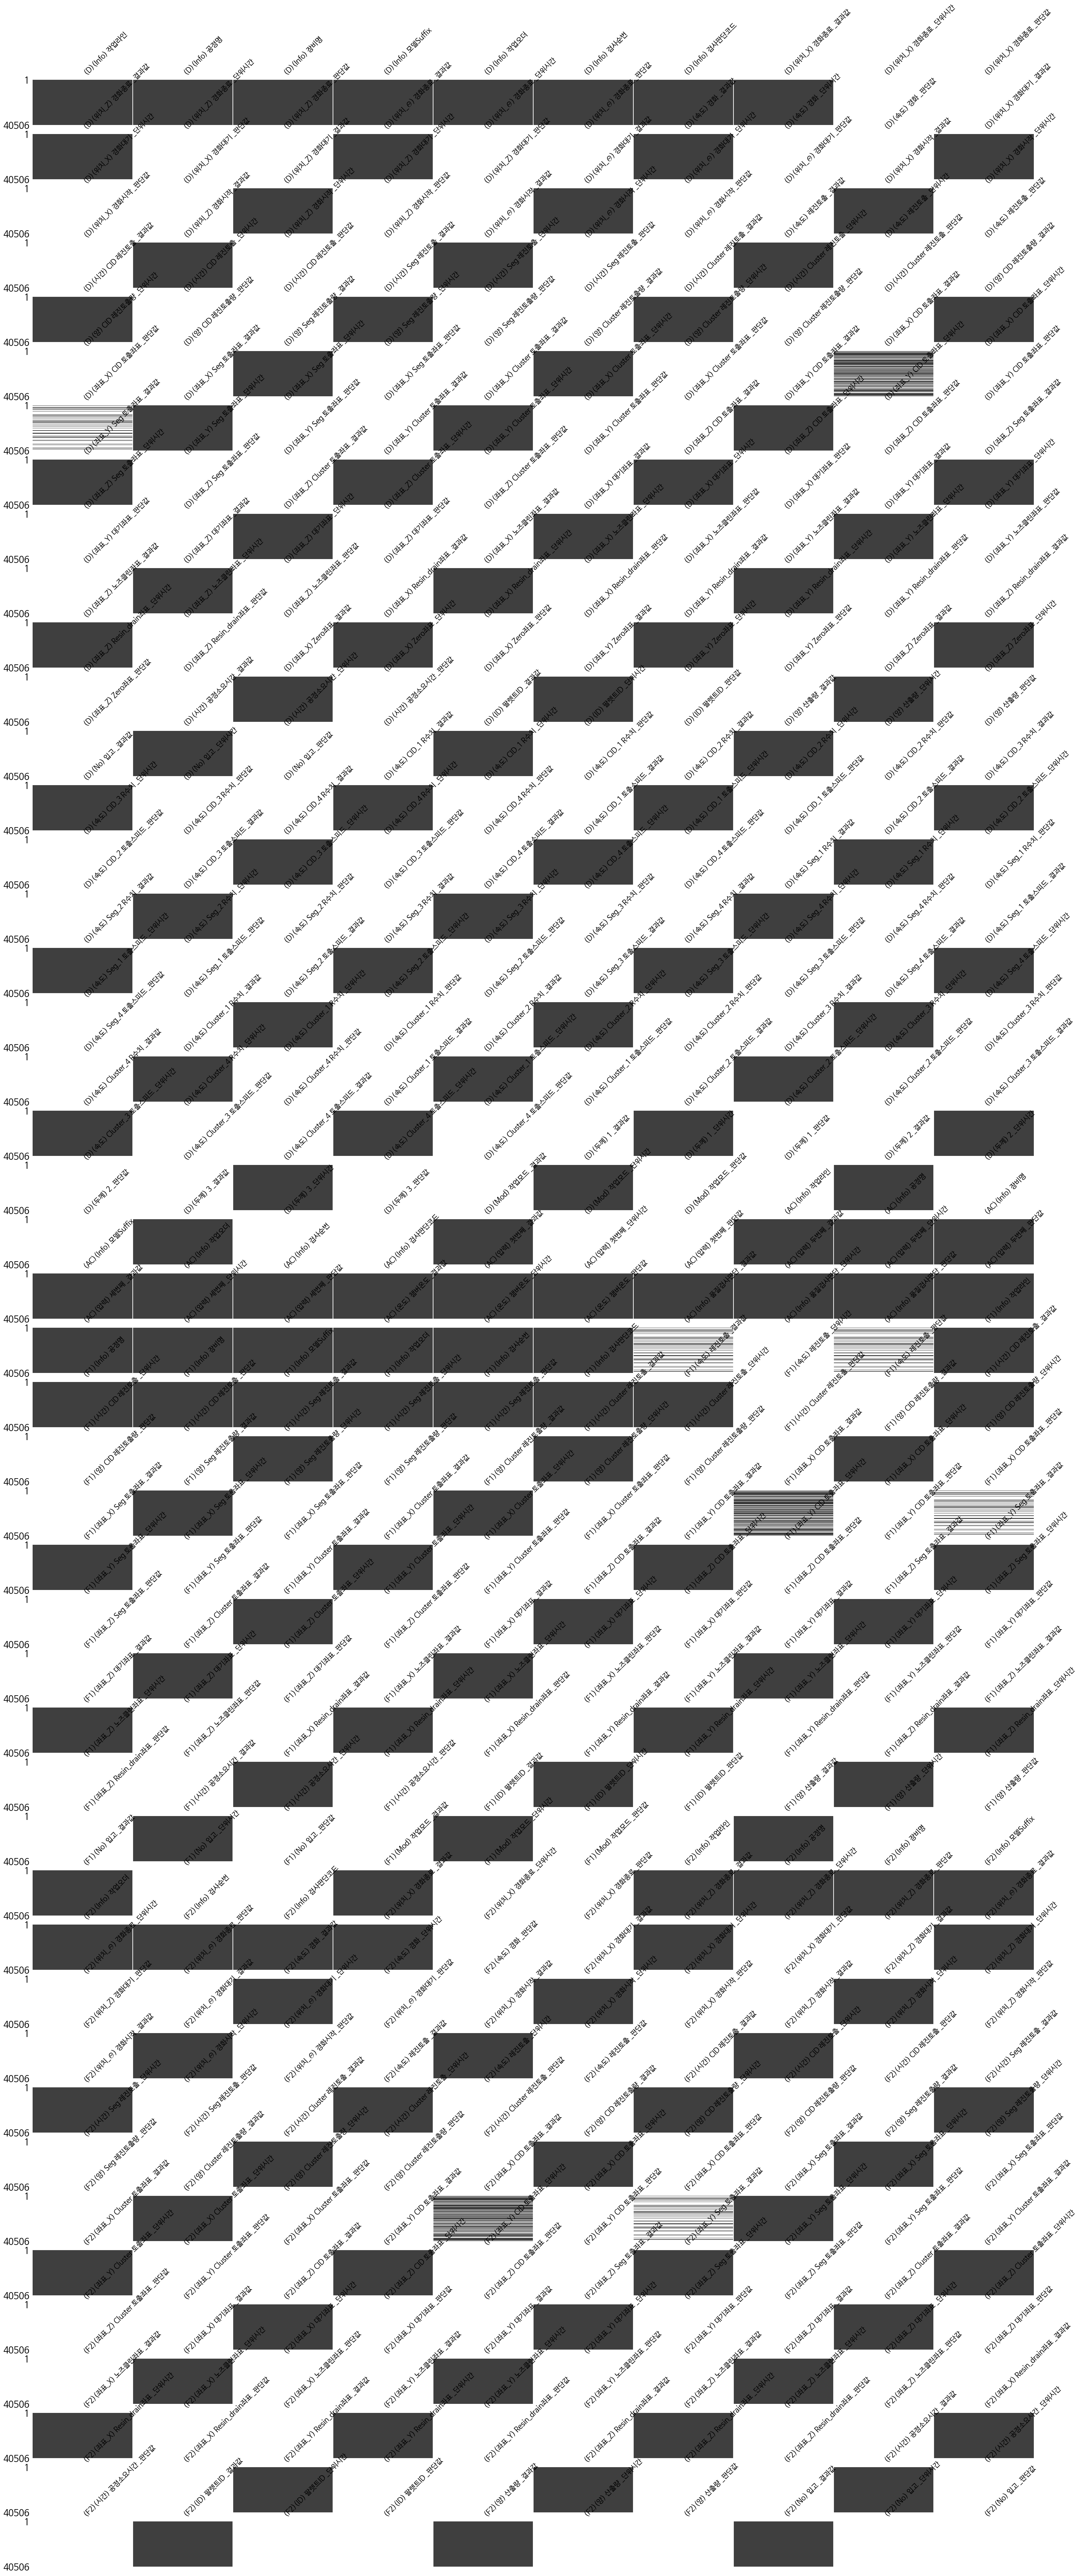

In [188]:
# 결측치 분포 확인
len_cols = len(train.columns)

fig, ax = plt.subplots(math.ceil(len_cols//10), 1, figsize=(40, 100))

for idx in range(10, len_cols, 10):
    msno.matrix(train.iloc[:, idx-10:idx], ax=ax[idx//10-1])

In [190]:
# 전체가 결측치인 컬럼
null_cols = [col
             for col in train.columns
             if (train[col].notnull().sum()==0)]
        
print("*** null_cols \n", null_cols, "\n\n\n -----------------------")

# 결측치가 아닌 컬럼
notnull_cols = [col
                for col in train.columns
                if (train[col].notnull().sum() > 0)]

print("*** notnull_cols \n", notnull_cols, "\n\n\n -----------------------")

# 부분적으로 결측치가 있는 컬럼
partialnull_cols = [col
                    for col in train.columns
                    if (0 < train[col].notnull().sum() < len(train))]

print("*** partialnull_cols \n", partialnull_cols, "\n\n\n -----------------------")

*** null_cols 
 ['(D)(위치_X) 경화종료 _단위시간', '(D)(위치_X) 경화종료 _판단값', '(D)(위치_Z) 경화종료 _단위시간', '(D)(위치_Z) 경화종료 _판단값', '(D)(위치_Θ) 경화종료 _단위시간', '(D)(위치_Θ) 경화종료 _판단값', '(D)(속도) 경화 _단위시간', '(D)(속도) 경화 _판단값', '(D)(위치_X) 경화대기 _단위시간', '(D)(위치_X) 경화대기 _판단값', '(D)(위치_Z) 경화대기 _단위시간', '(D)(위치_Z) 경화대기 _판단값', '(D)(위치_Θ) 경화대기 _단위시간', '(D)(위치_Θ) 경화대기 _판단값', '(D)(위치_X) 경화시작 _단위시간', '(D)(위치_X) 경화시작 _판단값', '(D)(위치_Z) 경화시작 _단위시간', '(D)(위치_Z) 경화시작 _판단값', '(D)(위치_Θ) 경화시작 _단위시간', '(D)(위치_Θ) 경화시작 _판단값', '(D)(속도) 레진토출 _단위시간', '(D)(속도) 레진토출 _판단값', '(D)(시간) CID 레진토출 _단위시간', '(D)(시간) CID 레진토출 _판단값', '(D)(시간) Seg 레진토출 _단위시간', '(D)(시간) Seg 레진토출 _판단값', '(D)(시간) Cluster 레진토출 _단위시간', '(D)(시간) Cluster 레진토출 _판단값', '(D)(양) CID 레진토출량 _단위시간', '(D)(양) CID 레진토출량 _판단값', '(D)(양) Seg 레진토출량 _단위시간', '(D)(양) Seg 레진토출량 _판단값', '(D)(양) Cluster 레진토출량 _단위시간', '(D)(양) Cluster 레진토출량 _판단값', '(D)(좌표_X) CID 토출좌표 _단위시간', '(D)(좌표_X) Seg 토출좌표 _단위시간', '(D)(좌표_X) Seg 토출좌표 _판단값', '(D)(좌표_X) Cluster 토출좌표 _단위시간', '(D)(좌표_X) Cluster 토출좌표 _판단값', '(D)(좌표_Y)

In [134]:
# 수치형 데이터 통계 (결측치행들로만 존재하는 컬럼은 제외)
stats_numeric = train[notnull_cols].describe()
for i in range(0, len(stats_numeric.columns), 6):
    display(stats_numeric.iloc[:, i:i+6])

(D)(Info) 검사순번  (D)(위치_X) 경화종료 _결과값  (D)(위치_Z) 경화종료 _결과값  \
count         40506.0         40506.000000         40506.000000   
mean              1.0           530.370809             6.320669   
std               0.0           369.283055             4.858988   
min               1.0           240.000000             2.500000   
25%               1.0           240.000000             2.500000   
50%               1.0           240.000000             2.500000   
75%               1.0          1000.000000            12.500000   
max               1.0          1000.000000            12.500000   

       (D)(위치_Θ) 경화종료 _결과값  (D)(속도) 경화 _결과값  (D)(위치_X) 경화대기 _결과값  
count         40506.000000     40506.000000              40506.0  
mean            -21.227966        73.864119               1150.0  
std              87.461776         9.761997                  0.0  
min             -90.000000        70.000000               1150.0  
25%             -90.000000        70.000000               1150.0  
50%             -90.000000        70.000000               1150.0  
75%              90.000000        70.000000               1150.0  
max              90.000000       105.000000               1150.0

(D)(위치_Z) 경화대기 _결과값  (D)(위치_Θ) 경화대기 _결과값  (D)(위치_X) 경화시작 _결과값  \
count              40506.0              40506.0         40506.000000   
mean                  33.5                  0.0           743.449859   
std                    0.0                  0.0           364.424068   
min                   33.5                  0.0           280.000000   
25%                   33.5                  0.0           280.000000   
50%                   33.5                  0.0          1030.000000   
75%                   33.5                  0.0          1030.000000   
max                   33.5                  0.0          1030.000000   

       (D)(위치_Z) 경화시작 _결과값  (D)(위치_Θ) 경화시작 _결과값  (D)(속도) 레진토출 _결과값  
count              40506.0         40506.000000       40506.000000  
mean                  33.5           -21.227966          12.882437  
std                    0.0            87.461776           2.997650  
min                   33.5           -90.000000          10.000000  
25%                   33.5           -90.000000          10.000000  
50%                   33.5           -90.000000          10.000000  
75%                   33.5            90.000000          16.000000  
max                   33.5            90.000000          16.000000

(D)(시간) CID 레진토출 _결과값  (D)(시간) Seg 레진토출 _결과값  \
count           40506.000000           40506.000000   
mean               14.272249               6.861304   
std                 3.743857               1.994393   
min                 9.600000               3.800000   
25%                13.100000               4.900000   
50%                13.200000               6.700000   
75%                17.000000               8.400000   
max                21.300000              10.600000   

       (D)(시간) Cluster 레진토출 _결과값  (D)(양) CID 레진토출량 _결과값  \
count               40506.000000           40506.000000   
mean                   14.262638               1.080569   
std                     3.733232               0.325965   
min                     9.600000               0.670000   
25%                    13.100000               0.910000   
50%                    13.200000               0.990000   
75%                    17.000000               1.450000   
max                    21.400000               2.340000   

       (D)(양) Seg 레진토출량 _결과값  (D)(양) Cluster 레진토출량 _결과값  
count           40506.000000               40506.000000  
mean                0.521604                   1.078539  
std                 0.187707                   0.324321  
min                 0.260000                   0.670000  
25%                 0.340000                   0.910000  
50%                 0.530000                   1.000000  
75%                 0.710000                   1.450000  
max                 0.940000                   1.620000

(D)(좌표_X) Seg 토출좌표 _결과값  (D)(좌표_X) Cluster 토출좌표 _결과값  \
count             40506.000000                 40506.000000   
mean                401.474823                   375.879818   
std                 157.990514                   148.995110   
min                 161.200000                   159.500000   
25%                 164.200000                   160.500000   
50%                 463.000000                   464.200000   
75%                 550.300000                   465.700000   
max                 552.100000                   552.000000   

       (D)(좌표_Y) CID 토출좌표 _결과값  (D)(좌표_Y) Seg 토출좌표 _결과값  \
count             40506.000000             40506.000000   
mean                442.879714               719.303459   
std                 298.591870               434.568694   
min                 159.800000               377.000000   
25%                 162.300000               377.300000   
50%                 377.500000               377.600000   
75%                 552.000000              1271.800000   
max                1271.800000              1281.800000   

       (D)(좌표_Y) Cluster 토출좌표 _결과값  (D)(좌표_Z) CID 토출좌표 _결과값  
count                 40506.000000             40506.000000  
mean                    741.947055               602.467942  
std                     464.817614               433.974562  
min                     377.100000               282.150000  
25%                     377.100000               284.800000  
50%                     377.500000               377.600000  
75%                    1270.700000              1271.800000  
max                    1394.200000              1282.000000

(D)(좌표_Z) Seg 토출좌표 _결과값  (D)(좌표_Z) Cluster 토출좌표 _결과값  \
count             40506.000000                 40506.000000   
mean                280.994474                   280.994474   
std                   3.608324                     3.608324   
min                 273.800000                   273.800000   
25%                 281.095000                   281.095000   
50%                 282.150000                   282.150000   
75%                 282.500000                   282.500000   
max                 284.800000                   284.800000   

       (D)(좌표_X) 대기좌표 _결과값  (D)(좌표_Y) 대기좌표 _결과값  (D)(좌표_Z) 대기좌표 _결과값  \
count         40506.000000         40506.000000         40506.000000   
mean            270.226372           179.446625            39.201452   
std              11.293773            93.799711            32.412466   
min             257.000000            66.000000             0.000000   
25%             257.000000            66.000000             0.000000   
50%             274.330000           257.000000            66.000000   
75%             282.150000           257.000000            66.000000   
max             282.500000           257.000000            66.000000   

       (D)(좌표_X) 노즈클린좌표 _결과값  
count           40506.000000  
mean               51.769923  
std                62.614991  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%               127.500000  
max               127.500000

(D)(좌표_Y) 노즈클린좌표 _결과값  (D)(좌표_Z) 노즈클린좌표 _결과값  \
count           40506.000000           40506.000000   
mean              102.528625              92.818206   
std                30.202525              32.454324   
min                66.000000              66.000000   
25%                66.000000              66.000000   
50%               127.500000              66.000000   
75%               127.500000             130.850000   
max               127.500000             133.500000   

       (D)(좌표_X) Resin_drain좌표 _결과값  (D)(좌표_Y) Resin_drain좌표 _결과값  \
count                  40506.000000                  40506.000000   
mean                     180.625737                    179.446625   
std                       63.198550                     93.799711   
min                      118.850000                     66.000000   
25%                      130.850000                     66.000000   
50%                      130.850000                    257.000000   
75%                      257.000000                    257.000000   
max                      257.000000                    257.000000   

       (D)(좌표_Z) Resin_drain좌표 _결과값  (D)(좌표_X) Zero좌표 _결과값  
count                  40506.000000           40506.000000  
mean                      92.819187             282.769347  
std                       32.455514             183.744304  
min                       66.000000             130.850000  
25%                       66.000000             130.850000  
50%                       66.000000             130.850000  
75%                      130.850000             505.000000  
max                      133.500000             505.000000

(D)(좌표_Y) Zero좌표 _결과값  (D)(좌표_Z) Zero좌표 _결과값  (D)(시간) 공정소요시간 _결과값  \
count           40506.000000           40506.000000         40506.000000   
mean              422.167592             285.794179           188.889714   
std               100.189689              17.193563            92.788947   
min               300.000000             265.000000            35.500000   
25%               300.000000             265.000000            88.400000   
50%               505.000000             300.000000           265.000000   
75%               505.000000             300.000000           265.020000   
max               505.000000             303.500000           999.900000   

       (D)(ID) 팔렛트ID _결과값  (D)(양) 산출량 _결과값  (D)(No) 입고 _결과값  
count        40506.000000     40506.000000     40506.000000  
mean            40.258789        73.507159       108.663260  
std             29.204686       105.142886       130.746962  
min              1.000000         0.000000         0.000000  
25%              7.000000         7.000000         1.000000  
50%             54.500000        13.000000        49.000000  
75%             65.900000       120.000000       196.000000  
max            362.300000       487.000000       608.000000

(D)(속도) CID_1 R수치 _결과값  (D)(속도) CID_2 R수치 _결과값  (D)(속도) CID_3 R수치 _결과값  \
count            40506.000000            40506.000000            40506.000000   
mean              2981.168987             6447.126352             6447.126352   
std               3841.458563             1683.336651             1683.336651   
min                  1.000000             4000.000000             4000.000000   
25%                  1.000000             5000.000000             5000.000000   
50%                  1.000000             6500.000000             6500.000000   
75%               5000.000000             6500.000000             6500.000000   
max               9000.000000             9000.000000             9000.000000   

       (D)(속도) CID_4 R수치 _결과값  (D)(속도) CID_1 토출스피드 _결과값  \
count            40506.000000              40506.000000   
mean              6447.126352               6441.892559   
std               1683.336651               1678.493268   
min               4000.000000               4000.000000   
25%               5000.000000               5000.000000   
50%               6500.000000               6500.000000   
75%               6500.000000               6500.000000   
max               9000.000000               9000.000000   

       (D)(속도) CID_2 토출스피드 _결과값  
count              40506.000000  
mean                6444.793364  
std                 1683.941794  
min                 4000.000000  
25%                 5000.000000  
50%                 6500.000000  
75%                 6500.000000  
max                13000.000000

(D)(속도) CID_3 토출스피드 _결과값  (D)(속도) CID_4 토출스피드 _결과값  \
count              40506.000000              40506.000000   
mean                6441.892559               6423.752037   
std                 1678.493268               1692.339152   
min                 4000.000000               4000.000000   
25%                 5000.000000               5000.000000   
50%                 6500.000000               6500.000000   
75%                 6500.000000               6500.000000   
max                 9000.000000               9000.000000   

       (D)(속도) Seg_1 R수치 _결과값  (D)(속도) Seg_2 R수치 _결과값  (D)(속도) Seg_3 R수치 _결과값  \
count            40506.000000            40506.000000            40506.000000   
mean              7256.166988             7112.933886             7112.933886   
std               2158.445657             2257.237787             2257.237787   
min               4000.000000             4000.000000             4000.000000   
25%               5800.000000             5300.000000             5300.000000   
50%               6500.000000             6500.000000             6500.000000   
75%               9000.000000             9000.000000             9000.000000   
max              12000.000000            12000.000000            12000.000000   

       (D)(속도) Seg_4 R수치 _결과값  
count            40506.000000  
mean              7112.933886  
std               2257.237787  
min               4000.000000  
25%               5300.000000  
50%               6500.000000  
75%               9000.000000  
max              12000.000000

(D)(속도) Seg_1 토출스피드 _결과값  (D)(속도) Seg_2 토출스피드 _결과값  \
count              40506.000000              40506.000000   
mean                7112.933886               7049.745717   
std                 2257.237787               2288.890870   
min                 4000.000000               4000.000000   
25%                 5300.000000               5300.000000   
50%                 6500.000000               6500.000000   
75%                 9000.000000               9000.000000   
max                12000.000000              13000.000000   

       (D)(속도) Seg_3 토출스피드 _결과값  (D)(속도) Seg_4 토출스피드 _결과값  \
count              40506.000000              40506.000000   
mean                7113.133857               7047.153508   
std                 2257.108169               2288.762373   
min                 4000.000000               4000.000000   
25%                 5300.000000               5300.000000   
50%                 6500.000000               6500.000000   
75%                 9000.000000               9000.000000   
max                12000.000000              12000.000000   

       (D)(속도) Cluster_1 R수치 _결과값  (D)(속도) Cluster_2 R수치 _결과값  
count                40506.000000                 40506.00000  
mean                  6304.093221                  6446.12650  
std                   1742.936306                  1683.45344  
min                   4000.000000                  4000.00000  
25%                   5000.000000                  5000.00000  
50%                   5500.000000                  6500.00000  
75%                   8000.000000                  6500.00000  
max                  12000.000000                  9000.00000

(D)(속도) Cluster_3 R수치 _결과값  (D)(속도) Cluster_4 R수치 _결과값  \
count                 40506.00000                 40506.00000   
mean                   6446.12650                  6446.12650   
std                    1683.45344                  1683.45344   
min                    4000.00000                  4000.00000   
25%                    5000.00000                  5000.00000   
50%                    6500.00000                  6500.00000   
75%                    6500.00000                  6500.00000   
max                    9000.00000                  9000.00000   

       (D)(속도) Cluster_1 토출스피드 _결과값  (D)(속도) Cluster_2 토출스피드 _결과값  \
count                  40506.000000                  40506.000000   
mean                    6440.892707                   6443.633042   
std                     1678.607276                   1683.742070   
min                     4000.000000                   4000.000000   
25%                     5000.000000                   5000.000000   
50%                     6500.000000                   6500.000000   
75%                     6500.000000                   6500.000000   
max                     9000.000000                   9000.000000   

       (D)(속도) Cluster_3 토출스피드 _결과값  (D)(속도) Cluster_4 토출스피드 _결과값  
count                  40506.000000                  40506.000000  
mean                    6440.892707                   6442.497408  
std                     1678.607276                   1683.872285  
min                     4000.000000                   4000.000000  
25%                     5000.000000                   5000.000000  
50%                     6500.000000                   6500.000000  
75%                     6500.000000                   6500.000000  
max                     9000.000000                   9000.000000

(D)(두께) 1 _결과값  (D)(두께) 2 _결과값  (D)(두께) 3 _결과값  (D)(Mod) 작업모드 _결과값  \
count    40506.000000    40506.000000    40506.000000        40506.000000   
mean      3465.728534       -0.001699       -0.008232            2.837479   
std       2954.932792        0.009579        0.033599            3.441728   
min          0.000000       -0.054000       -0.219000           -0.118000   
25%          0.000000        0.000000        0.000000            0.000000   
50%       4000.000000        0.000000        0.000000            0.000000   
75%       6500.000000        0.000000        0.000000            7.000000   
max       6500.000000        0.037000        0.007000            7.000000   

       (AC)(Info) 검사순번  (AC)(압력) 첫번째 _결과값  
count          40506.0       40506.000000  
mean               1.0           0.307124  
std                0.0           0.005369  
min                1.0           0.290000  
25%                1.0           0.302000  
50%                1.0           0.308000  
75%                1.0           0.312000  
max                1.0           0.319000

(AC)(압력) 첫번째 _단위시간  (AC)(압력) 두번째 _결과값  (AC)(압력) 두번째 _단위시간  \
count        40506.000000       40506.000000        40506.000000   
mean           244.949119           0.396764           56.932035   
std             21.475360           0.096129           56.123765   
min              0.000000           0.297000            0.000000   
25%            241.000000           0.309000            1.000000   
50%            241.000000           0.316000           60.000000   
75%            241.000000           0.491000          121.000000   
max            300.000000           0.900000          181.000000   

       (AC)(압력) 세번째 _결과값  (AC)(압력) 세번째 _단위시간  (AC)(온도) 챔버온도 _결과값  
count       40506.000000        40506.000000        40506.000000  
mean            0.501117          122.104059           51.691725  
std             0.025190            8.775836            2.878083  
min             0.305000            1.000000           32.000000  
25%             0.498000          120.000000           49.000000  
50%             0.499000          121.000000           52.000000  
75%             0.500000          121.000000           54.000000  
max             0.914000          301.000000           59.000000

(AC)(온도) 챔버온도 _단위시간  (F1)(Info) 검사순번  (F1)(속도) 레진토출 _결과값  \
count         40506.000000          40506.0        40506.000000   
mean            423.985212              1.0           10.610606   
std              61.066771              0.0            0.255546   
min               3.000000              1.0            0.000000   
25%             363.000000              1.0           10.600000   
50%             452.000000              1.0           10.600000   
75%             483.000000              1.0           10.600000   
max             540.000000              1.0           10.900000   

       (F1)(시간) CID 레진토출 _결과값  (F1)(시간) Seg 레진토출 _결과값  \
count            40506.000000            40506.000000   
mean                13.338538                3.885679   
std                  0.673930                0.699187   
min                  0.000000                0.000000   
25%                 12.900000                3.600000   
50%                 13.400000                3.600000   
75%                 13.500000                3.900000   
max                 17.400000               14.800000   

       (F1)(시간) Cluster 레진토출 _결과값  
count                40506.000000  
mean                    13.368997  
std                      0.519626  
min                      0.000000  
25%                     12.900000  
50%                     13.500000  
75%                     13.500000  
max                     17.400000

(F1)(양) CID 레진토출량 _결과값  (F1)(양) Seg 레진토출량 _결과값  \
count            40506.000000            40506.000000   
mean                12.636729                3.681266   
std                  0.543178                0.658339   
min                  0.000000                0.000000   
25%                 12.250000                3.420000   
50%                 12.730000                3.420000   
75%                 12.820000                3.700000   
max                 14.060000               14.060000   

       (F1)(양) Cluster 레진토출량 _결과값  (F1)(좌표_X) Seg 토출좌표 _결과값  \
count                40506.000000              40506.000000   
mean                    12.665543                681.146171   
std                      0.361528                188.471206   
min                      0.000000                156.100000   
25%                     12.250000                458.800000   
50%                     12.730000                837.700000   
75%                     12.820000                838.400000   
max                     14.060000                838.400000   

       (F1)(좌표_X) Cluster 토출좌표 _결과값  (F1)(좌표_Y) CID 토출좌표 _결과값  
count                  40506.000000              40506.000000  
mean                     336.908115                348.980914  
std                      149.640798                329.498146  
min                      157.000000                156.100000  
25%                      157.000000                157.000000  
50%                      458.300000                157.000000  
75%                      458.400000                430.200000  
max                      838.400000               1323.200000

(F1)(좌표_Y) Seg 토출좌표 _결과값  (F1)(좌표_Y) Cluster 토출좌표 _결과값  \
count              40506.000000                  40506.000000   
mean                 771.834291                    771.459389   
std                  433.798904                    433.541887   
min                  429.800000                    429.500000   
25%                  430.500000                    430.500000   
50%                  431.100000                    430.800000   
75%                 1323.500000                   1322.500000   
max                 1332.800000                   1325.800000   

       (F1)(좌표_Z) CID 토출좌표 _결과값  (F1)(좌표_Z) Seg 토출좌표 _결과값  \
count              40506.000000              40506.000000   
mean                 617.307406                244.393107   
std                  461.863409                  0.144470   
min                  244.200000                225.850000   
25%                  244.400000                244.300000   
50%                  431.100000                244.400000   
75%                 1323.100000                244.490000   
max                 1332.700000                244.728000   

       (F1)(좌표_Z) Cluster 토출좌표 _결과값  (F1)(좌표_X) 대기좌표 _결과값  
count                   40506.00000          40506.000000  
mean                      244.39356            262.530928  
std                         0.11128             21.885462  
min                       244.20000            225.850000  
25%                       244.30000            244.400000  
50%                       244.40000            244.535000  
75%                       244.49000            289.000000  
max                       244.72800            289.000000

(F1)(좌표_Y) 대기좌표 _결과값  (F1)(좌표_Z) 대기좌표 _결과값  (F1)(좌표_X) 노즈클린좌표 _결과값  \
count          40506.000000          40506.000000            40506.000000   
mean             191.956772             29.698069               50.105165   
std              117.372414             24.554898               60.601489   
min               50.000000              0.000000                0.000000   
25%               50.000000              0.000000                0.000000   
50%              289.000000             50.000000                0.000000   
75%              289.000000             50.000000              123.400000   
max              289.000000             50.000000              123.400000   

       (F1)(좌표_Y) 노즈클린좌표 _결과값  (F1)(좌표_Z) 노즈클린좌표 _결과값  \
count            40506.000000            40506.000000   
mean                93.596766               67.134829   
std                 36.046591               20.724334   
min                 50.000000               50.000000   
25%                 50.000000               50.000000   
50%                123.400000               50.000000   
75%                123.400000               92.200000   
max                123.400000               92.200000   

       (F1)(좌표_X) Resin_drain좌표 _결과값  
count                   40506.000000  
mean                      172.108399  
std                        96.648080  
min                        92.200000  
25%                        92.200000  
50%                        92.200000  
75%                       289.000000  
max                       289.000000

(F1)(좌표_Y) Resin_drain좌표 _결과값  (F1)(좌표_Z) Resin_drain좌표 _결과값  \
count                   40506.000000                   40506.000000   
mean                      191.956772                      76.277712   
std                       117.372414                      37.088273   
min                        50.000000                      50.000000   
25%                        50.000000                      50.000000   
50%                       289.000000                      50.000000   
75%                       289.000000                      85.000000   
max                       289.000000                     145.000000   

       (F1)(시간) 공정소요시간 _결과값  (F1)(ID) 팔렛트ID _결과값  (F1)(양) 산출량 _결과값  \
count          40506.000000         40506.000000      40506.000000   
mean             110.099269            37.596215         73.527132   
std               31.248510            26.606793        105.165169   
min               40.300000             0.000000          0.000000   
25%               90.200000             7.000000          7.000000   
50%              128.000000            54.300000         13.000000   
75%              128.000000            57.500000        120.000000   
max              161.400000           214.900000        487.000000   

       (F1)(No) 입고 _결과값  
count      40506.000000  
mean         108.667926  
std          130.752720  
min            0.000000  
25%            1.000000  
50%           49.000000  
75%          196.000000  
max          608.000000

(F1)(Mod) 작업모드 _결과값  (F2)(Info) 검사순번  (F2)(위치_X) 경화종료 _결과값  \
count         40506.000000          40506.0          40506.000000   
mean              3.613736              1.0            242.541846   
std               3.015700              0.0             44.454779   
min               1.000000              1.0            240.000000   
25%               1.000000              1.0            240.000000   
50%               1.000000              1.0            240.000000   
75%               7.000000              1.0            240.000000   
max              17.000000              1.0           1020.000000   

       (F2)(위치_Z) 경화종료 _결과값  (F2)(위치_Θ) 경화종료 _결과값  (F2)(속도) 경화 _결과값  
count          40506.000000               40506.0      40506.000000  
mean              32.793784                 -90.0         49.623587  
std                0.651463                   0.0          1.358472  
min               22.000000                 -90.0         40.000000  
25%               33.000000                 -90.0         50.000000  
50%               33.000000                 -90.0         50.000000  
75%               33.000000                 -90.0         50.000000  
max               33.000000                 -90.0         75.000000

(F2)(위치_X) 경화대기 _결과값  (F2)(위치_Z) 경화대기 _결과값  (F2)(위치_Θ) 경화대기 _결과값  \
count               40506.0          40506.000000               40506.0   
mean                 1020.0             32.701229                   0.0   
std                     0.0              1.391567                   0.0   
min                  1020.0             22.000000                   0.0   
25%                  1020.0             33.000000                   0.0   
50%                  1020.0             33.000000                   0.0   
75%                  1020.0             33.000000                   0.0   
max                  1020.0             33.000000                   0.0   

       (F2)(위치_X) 경화시작 _결과값  (F2)(위치_Z) 경화시작 _결과값  (F2)(위치_Θ) 경화시작 _결과값  
count          40506.000000          40506.000000               40506.0  
mean            1017.458154             32.701229                  90.0  
std               44.454779              1.391567                   0.0  
min              240.000000             22.000000                  90.0  
25%             1020.000000             33.000000                  90.0  
50%             1020.000000             33.000000                  90.0  
75%             1020.000000             33.000000                  90.0  
max             1020.000000             33.000000                  90.0

(F2)(속도) 레진토출 _결과값  (F2)(시간) CID 레진토출 _결과값  (F2)(시간) Seg 레진토출 _결과값  \
count             40506.0                 40506.0                 40506.0   
mean                  0.0                     0.0                     0.0   
std                   0.0                     0.0                     0.0   
min                   0.0                     0.0                     0.0   
25%                   0.0                     0.0                     0.0   
50%                   0.0                     0.0                     0.0   
75%                   0.0                     0.0                     0.0   
max                   0.0                     0.0                     0.0   

       (F2)(시간) Cluster 레진토출 _결과값  (F2)(양) CID 레진토출량 _결과값  \
count                     40506.0                 40506.0   
mean                          0.0                     0.0   
std                           0.0                     0.0   
min                           0.0                     0.0   
25%                           0.0                     0.0   
50%                           0.0                     0.0   
75%                           0.0                     0.0   
max                           0.0                     0.0   

       (F2)(양) Seg 레진토출량 _결과값  
count                 40506.0  
mean                      0.0  
std                       0.0  
min                       0.0  
25%                       0.0  
50%                       0.0  
75%                       0.0  
max                       0.0

(F2)(양) Cluster 레진토출량 _결과값  (F2)(좌표_X) Seg 토출좌표 _결과값  \
count                     40506.0              40506.000000   
mean                          0.0                530.044018   
std                           0.0                211.229599   
min                           0.0                304.800000   
25%                           0.0                305.000000   
50%                           0.0                458.000000   
75%                           0.0                835.500000   
max                           0.0                835.500000   

       (F2)(좌표_X) Cluster 토출좌표 _결과값  (F2)(좌표_Y) CID 토출좌표 _결과값  \
count                  40506.000000              40506.000000   
mean                     395.193744                503.670632   
std                      174.540641                328.974274   
min                      156.000000                156.000000   
25%                      156.000000                156.000000   
50%                      458.000000                428.000000   
75%                      499.800000                694.000000   
max                      694.000000               1324.200000   

       (F2)(좌표_Y) Seg 토출좌표 _결과값  (F2)(좌표_Y) Cluster 토출좌표 _결과값  
count              40506.000000                  40506.000000  
mean                 770.465047                    770.466800  
std                  435.508924                    435.507546  
min                  427.900000                    427.900000  
25%                  427.900000                    427.900000  
50%                  428.000000                    428.000000  
75%                 1324.200000                   1324.200000  
max                 1324.200000                   1324.200000

(F2)(좌표_Z) CID 토출좌표 _결과값  (F2)(좌표_Z) Seg 토출좌표 _결과값  \
count              40506.000000              40506.000000   
mean                 616.460433                243.623567   
std                  462.888232                  0.097185   
min                  243.500000                243.500000   
25%                  243.700000                243.500000   
50%                  428.000000                243.700000   
75%                 1324.200000                243.700000   
max                 1324.200000                243.700000   

       (F2)(좌표_Z) Cluster 토출좌표 _결과값  (F2)(좌표_X) 대기좌표 _결과값  \
count                  40506.000000          40506.000000   
mean                     243.623567            254.320054   
std                        0.097185             12.964691   
min                      243.500000            243.500000   
25%                      243.500000            243.500000   
50%                      243.700000            243.700000   
75%                      243.700000            270.000000   
max                      243.700000            270.000000   

       (F2)(좌표_Y) 대기좌표 _결과값  (F2)(좌표_Z) 대기좌표 _결과값  
count          40506.000000          40506.000000  
mean             180.671505             25.637683  
std              108.041552             29.465878  
min               50.000000            -10.000000  
25%               50.000000            -10.000000  
50%              270.000000             50.000000  
75%              270.000000             50.000000  
max              270.000000             50.000000

(F2)(좌표_X) 노즈클린좌표 _결과값  (F2)(좌표_Y) 노즈클린좌표 _결과값  (F2)(좌표_Z) 노즈클린좌표 _결과값  \
count            40506.000000            40506.000000            40506.000000   
mean                42.378981               90.983336               66.972414   
std                 63.351638               33.885760               20.527895   
min                -10.000000               50.000000               50.000000   
25%                -10.000000               50.000000               50.000000   
50%                -10.000000              119.000000               50.000000   
75%                119.000000              119.000000               91.800000   
max                119.000000              119.000000               91.800000   

       (F2)(좌표_X) Resin_drain좌표 _결과값  (F2)(좌표_Y) Resin_drain좌표 _결과값  \
count                   40506.000000                   40506.000000   
mean                      164.156081                     180.671505   
std                        87.513657                     108.041552   
min                        91.800000                      50.000000   
25%                        91.800000                      50.000000   
50%                        91.800000                     270.000000   
75%                       270.000000                     270.000000   
max                       270.000000                     270.000000   

       (F2)(좌표_Z) Resin_drain좌표 _결과값  
count                   40506.000000  
mean                       64.211351  
std                        17.188429  
min                        50.000000  
25%                        50.000000  
50%                        50.000000  
75%                        85.000000  
max                        85.000000

(F2)(시간) 공정소요시간 _결과값  (F2)(ID) 팔렛트ID _결과값  (F2)(양) 산출량 _결과값  \
count          40506.000000         40506.000000      40506.000000   
mean              62.048909            14.385928         73.539648   
std               36.466634             7.261448        105.176311   
min               17.600000             1.000000          0.000000   
25%               19.600000             7.000000          7.000000   
50%               85.000000            19.500000         13.000000   
75%               85.000000            19.900000        120.000000   
max              284.100000            52.900000        487.000000   

       (F2)(No) 입고 _결과값  (F2)(Mod) 작업모드 _결과값  
count      40506.000000         40506.000000  
mean         108.691453             0.771392  
std          130.758018             1.289203  
min            0.000000             0.000000  
25%            1.000000             0.000000  
50%           49.000000             1.000000  
75%          196.000000             1.000000  
max          608.000000            17.000000

In [135]:
# 범주형 데이터 통계
stats_categorical = train.describe(include='O')
for i in range(0, len(stats_categorical.columns), 6):
    display(stats_categorical.iloc[:, i:i+6])

(D)(Info) 작업라인  (D)(Info) 공정명     (D)(Info) 장비명 (D)(Info) 모델Suffix  \
count           40506          40506             40506              40506   
unique              1              1                 2                  7   
top           IVI-OB6  Dam Dispenser  Dam dispenser #1        AJX75334501   
freq            40506          40506             25030              33820   

       (D)(Info) 작업오더 (D)(Info) 검사판단코드  
count           40506            40506  
unique            663                1  
top        3L1X8574-2               OK  
freq              272            40506

(D)(좌표_X) CID 토출좌표 _결과값 (D)(좌표_X) CID 토출좌표 _판단값 (AC)(Info) 작업라인  \
count                    27740                   11293           40506   
unique                       7                       1               1   
top                         OK                      OK         IVI-OB6   
freq                     11293                   11293           40506   

        (AC)(Info) 공정명  (AC)(Info) 장비명 (AC)(Info) 모델Suffix  
count            40506           40506               40506  
unique               1               1                   7  
top     Auto Clave Out  Auto Clave Out         AJX75334501  
freq             40506           40506               33820

(AC)(Info) 작업오더 (AC)(Info) 검사판단코드 (AC)(압력) 첫번째 _판단값 (AC)(압력) 두번째 _판단값  \
count            40506             40506             40506             40506   
unique             663                 1                 1                 1   
top         3L1X8574-2                OK                OK                OK   
freq               272             40506             40506             40506   

       (AC)(압력) 세번째 _판단값 (AC)(온도) 챔버온도 _판단값  
count              40506              40506  
unique                 1                  2  
top                   OK                 OK  
freq               40506              29112

(AC)(Info) 품질검사판단 _결과값 (AC)(Info) 품질검사판단 _판단값 (F1)(Info) 작업라인  \
count                   11293                  11293           40506   
unique                      1                      1               1   
top                        OK                     OK         IVI-OB6   
freq                    11293                  11293           40506   

         (F1)(Info) 공정명      (F1)(Info) 장비명 (F1)(Info) 모델Suffix  
count             40506               40506               40506  
unique                1                   2                   7  
top     Fill1 Dispenser  Fill1 dispenser #1         AJX75334501  
freq              40506               25027               33820

(F1)(Info) 작업오더 (F1)(Info) 검사판단코드 (F1)(좌표_X) CID 토출좌표 _결과값  \
count            40506             40506                    27740   
unique             663                 1                        6   
top         3L1X8574-2                OK                       OK   
freq               272             40506                    11293   

       (F1)(좌표_X) CID 토출좌표 _판단값 (F2)(Info) 작업라인   (F2)(Info) 공정명  
count                     11293           40506            40506  
unique                        1               1                1  
top                          OK         IVI-OB6  Fill2 Dispenser  
freq                      11293           40506            40506

(F2)(Info) 장비명 (F2)(Info) 모델Suffix (F2)(Info) 작업오더  \
count                40506               40506           40506   
unique                   2                   7             663   
top     Fill2 dispenser #1         AJX75334501      3L1X8574-2   
freq                 25026               33820             272   

       (F2)(Info) 검사판단코드 (F2)(좌표_X) CID 토출좌표 _결과값 (F2)(좌표_X) CID 토출좌표 _판단값  
count              40506                    27740                    11293  
unique                 1                        3                        1  
top                   OK                    835.5                       OK  
freq               40506                    12868                    11293

target
count    40506
unique       2
top     Normal
freq     38156

---

## 2. Target Data

target
Normal      38156
AbNormal     2350
Name: count, dtype: int64


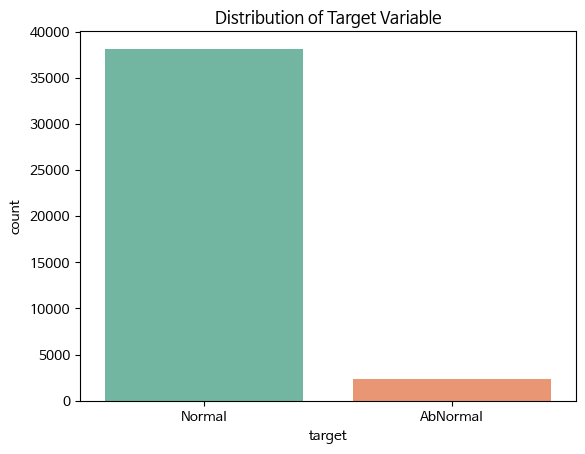

In [136]:
print(train['target'].value_counts())

sns.countplot(x='target', data=train, palette='Set2')
plt.title('Distribution of Target Variable')
plt.show()

---

## 3. Train Data

### 3.1 Numerical Columns

In [139]:
numeric_df = train[notnull_cols].select_dtypes(exclude='O')
numeric_cols = numeric_df.columns
numeric_cols

Index(['(D)(Info) 검사순번', '(D)(위치_X) 경화종료 _결과값', '(D)(위치_Z) 경화종료 _결과값',
       '(D)(위치_Θ) 경화종료 _결과값', '(D)(속도) 경화 _결과값', '(D)(위치_X) 경화대기 _결과값',
       '(D)(위치_Z) 경화대기 _결과값', '(D)(위치_Θ) 경화대기 _결과값', '(D)(위치_X) 경화시작 _결과값',
       '(D)(위치_Z) 경화시작 _결과값',
       ...
       '(F2)(좌표_Y) 노즈클린좌표 _결과값', '(F2)(좌표_Z) 노즈클린좌표 _결과값',
       '(F2)(좌표_X) Resin_drain좌표 _결과값', '(F2)(좌표_Y) Resin_drain좌표 _결과값',
       '(F2)(좌표_Z) Resin_drain좌표 _결과값', '(F2)(시간) 공정소요시간 _결과값',
       '(F2)(ID) 팔렛트ID _결과값', '(F2)(양) 산출량 _결과값', '(F2)(No) 입고 _결과값',
       '(F2)(Mod) 작업모드 _결과값'],
      dtype='object', length=149)

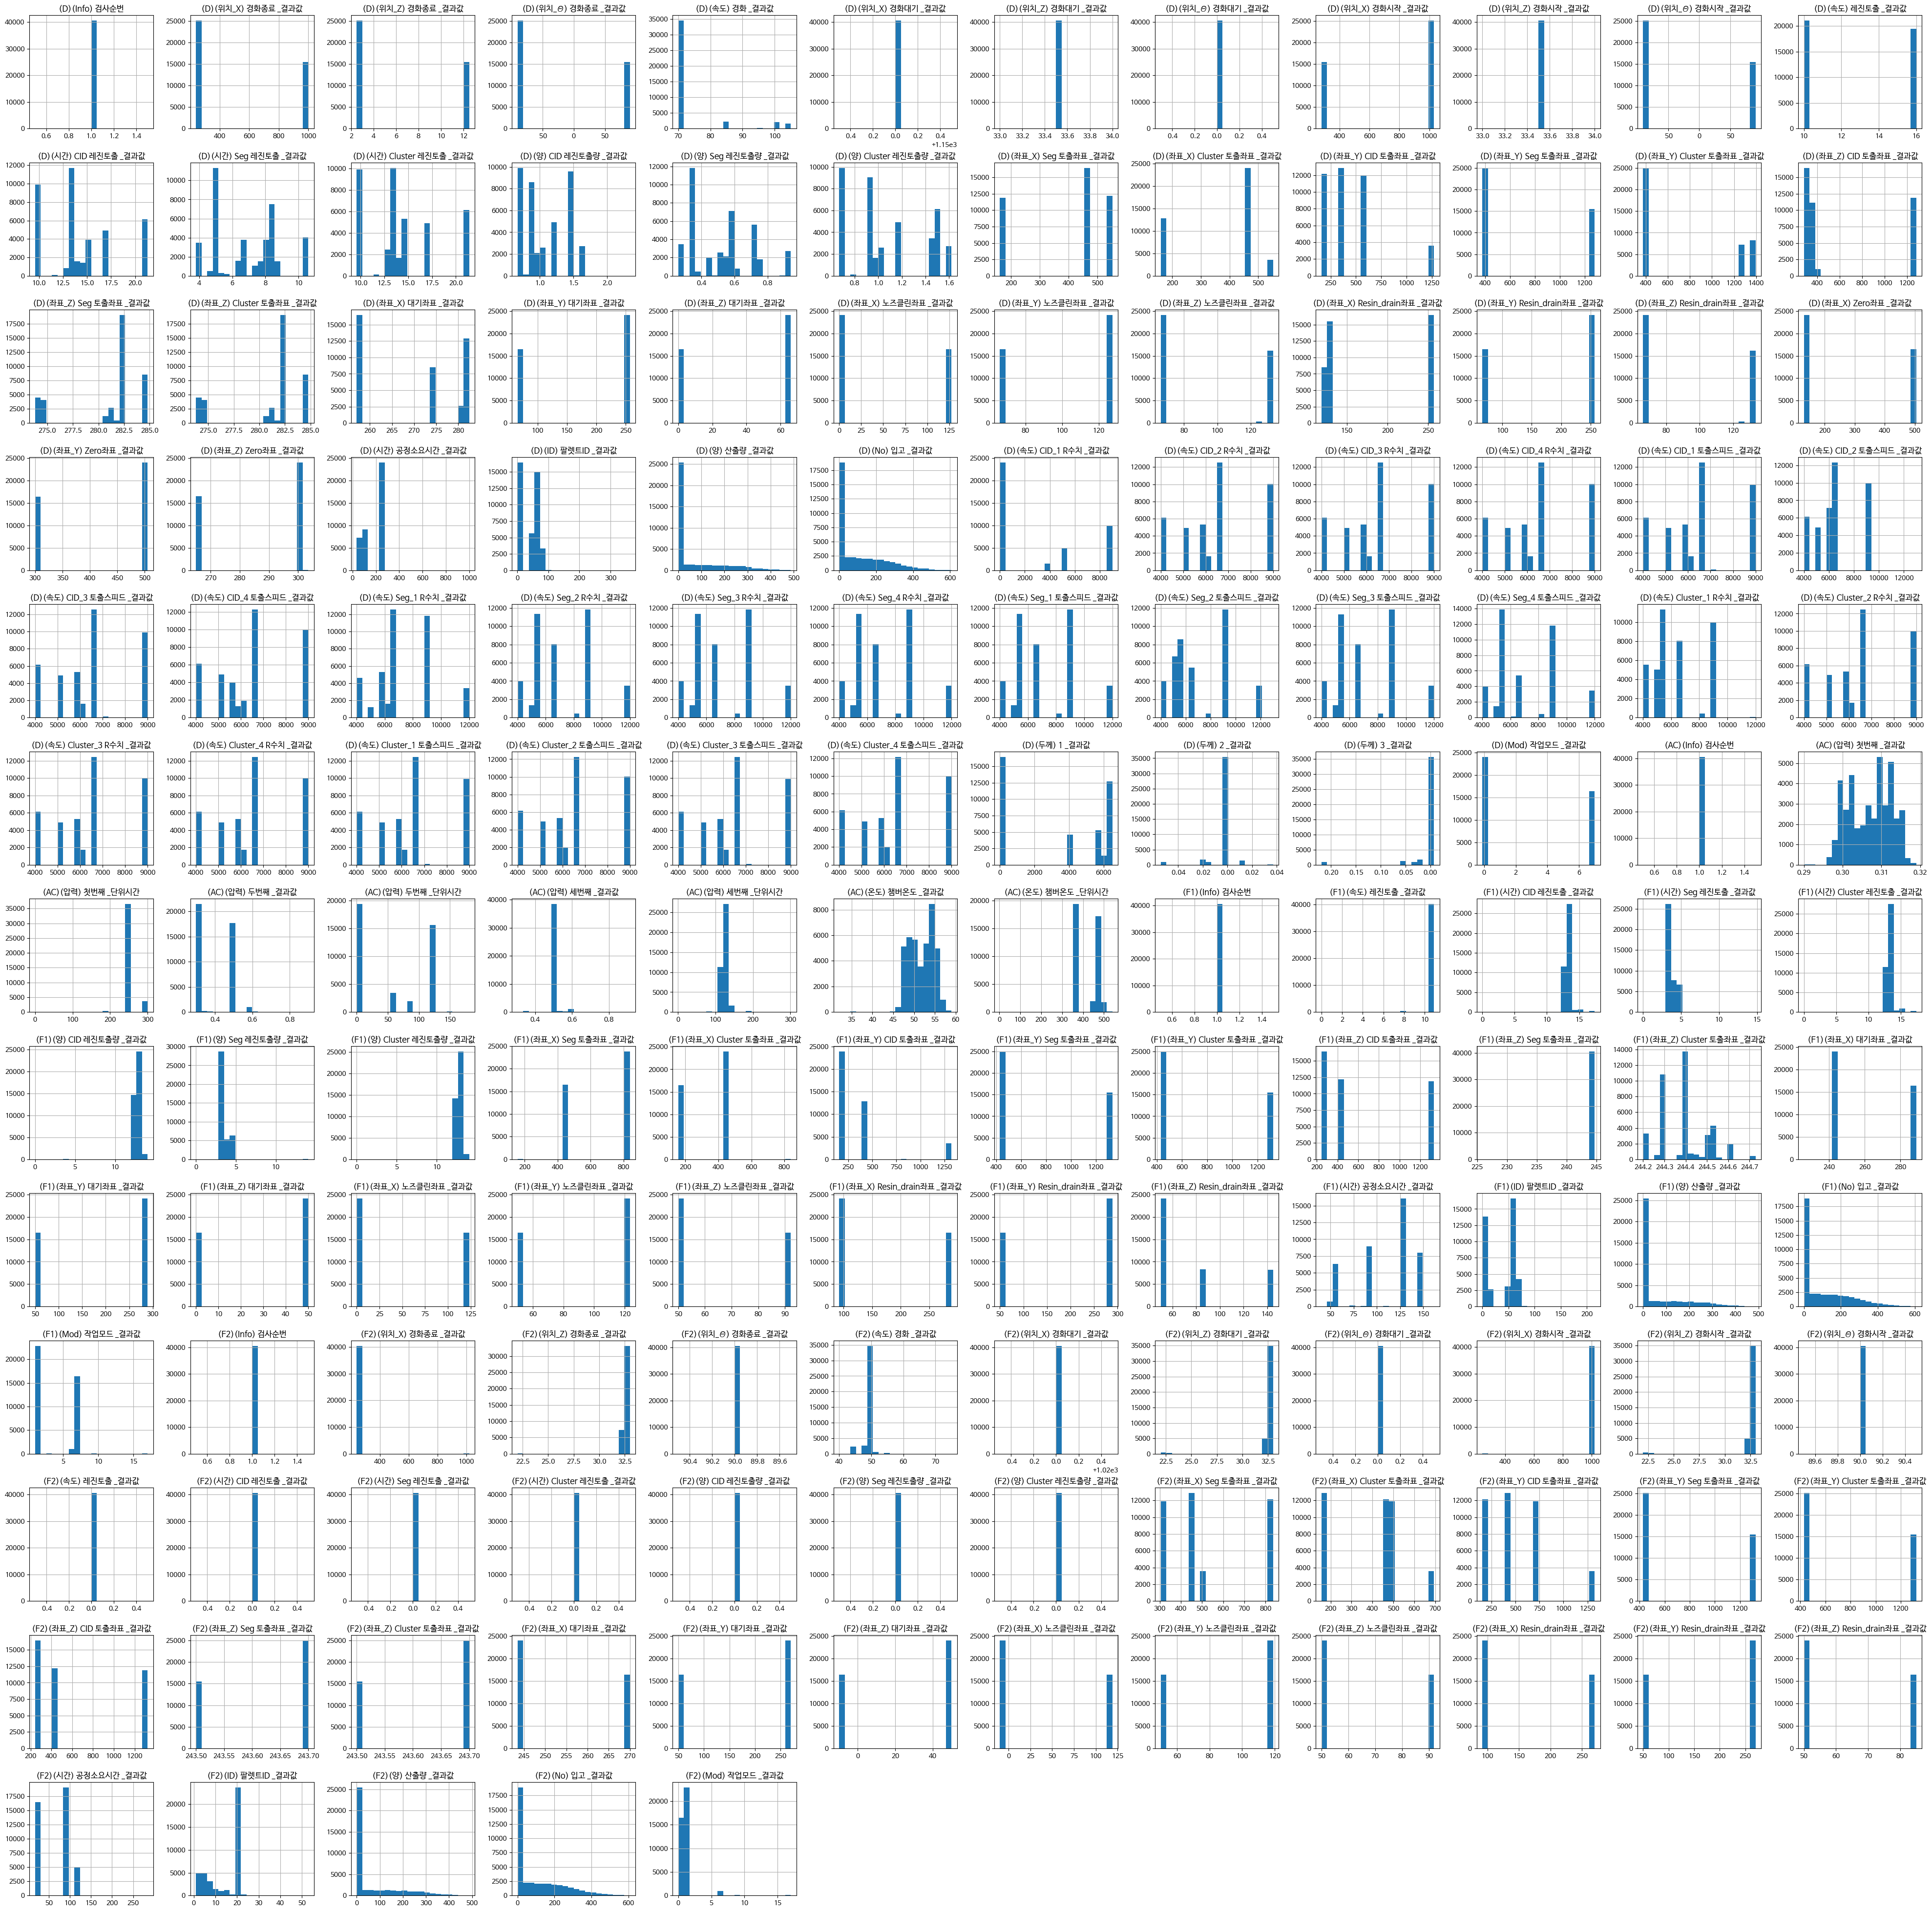

In [145]:
numeric_df.hist(bins=20, figsize=(50, 50))
plt.show()

In [200]:
train['(F1)(No) 입고 _결과값'].value_counts()

(F1)(No) 입고 _결과값
1      16512
14        91
33        88
30        85
44        85
       ...  
596        1
583        1
608        1
544        1
576        1
Name: count, Length: 607, dtype: int64

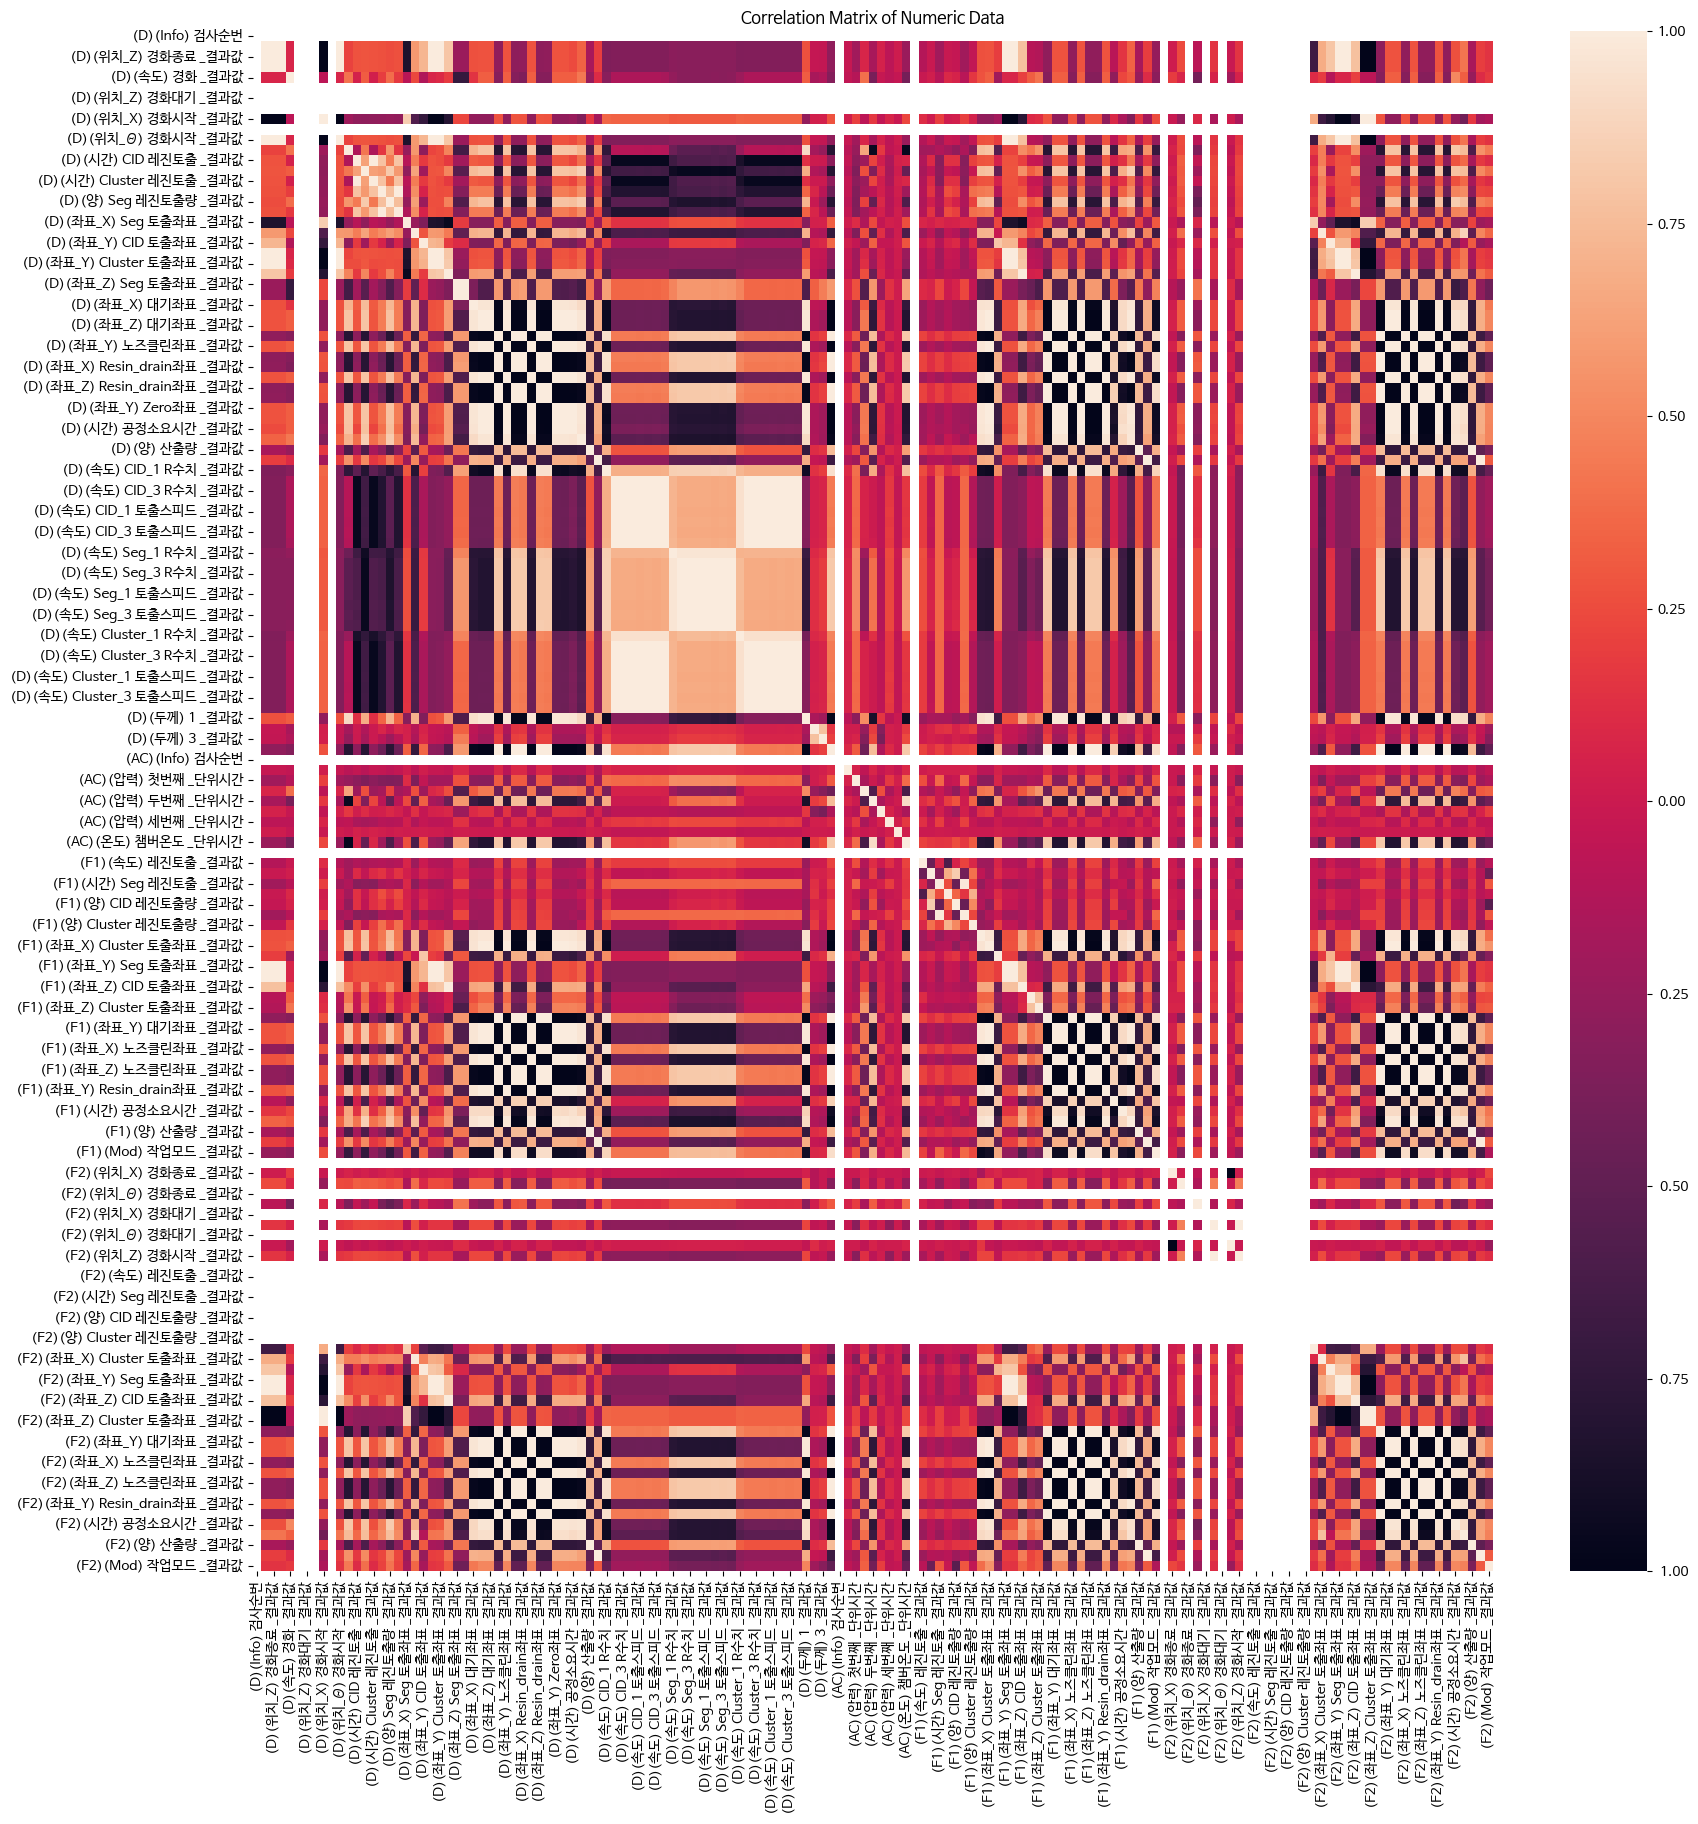

In [150]:
numeric_corr = numeric_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=False)
plt.title('Correlation Matrix of Numeric Data')
plt.show()

### 3.2 Categorical Columns

In [155]:
categorical_df = train.select_dtypes(include='O')
categorical_cols = categorical_df.columns[:-1]
categorical_cols

Index(['(D)(Info) 작업라인', '(D)(Info) 공정명', '(D)(Info) 장비명',
       '(D)(Info) 모델Suffix', '(D)(Info) 작업오더', '(D)(Info) 검사판단코드',
       '(D)(좌표_X) CID 토출좌표 _결과값', '(D)(좌표_X) CID 토출좌표 _판단값', '(AC)(Info) 작업라인',
       '(AC)(Info) 공정명', '(AC)(Info) 장비명', '(AC)(Info) 모델Suffix',
       '(AC)(Info) 작업오더', '(AC)(Info) 검사판단코드', '(AC)(압력) 첫번째 _판단값',
       '(AC)(압력) 두번째 _판단값', '(AC)(압력) 세번째 _판단값', '(AC)(온도) 챔버온도 _판단값',
       '(AC)(Info) 품질검사판단 _결과값', '(AC)(Info) 품질검사판단 _판단값', '(F1)(Info) 작업라인',
       '(F1)(Info) 공정명', '(F1)(Info) 장비명', '(F1)(Info) 모델Suffix',
       '(F1)(Info) 작업오더', '(F1)(Info) 검사판단코드', '(F1)(좌표_X) CID 토출좌표 _결과값',
       '(F1)(좌표_X) CID 토출좌표 _판단값', '(F2)(Info) 작업라인', '(F2)(Info) 공정명',
       '(F2)(Info) 장비명', '(F2)(Info) 모델Suffix', '(F2)(Info) 작업오더',
       '(F2)(Info) 검사판단코드', '(F2)(좌표_X) CID 토출좌표 _결과값',
       '(F2)(좌표_X) CID 토출좌표 _판단값'],
      dtype='object')

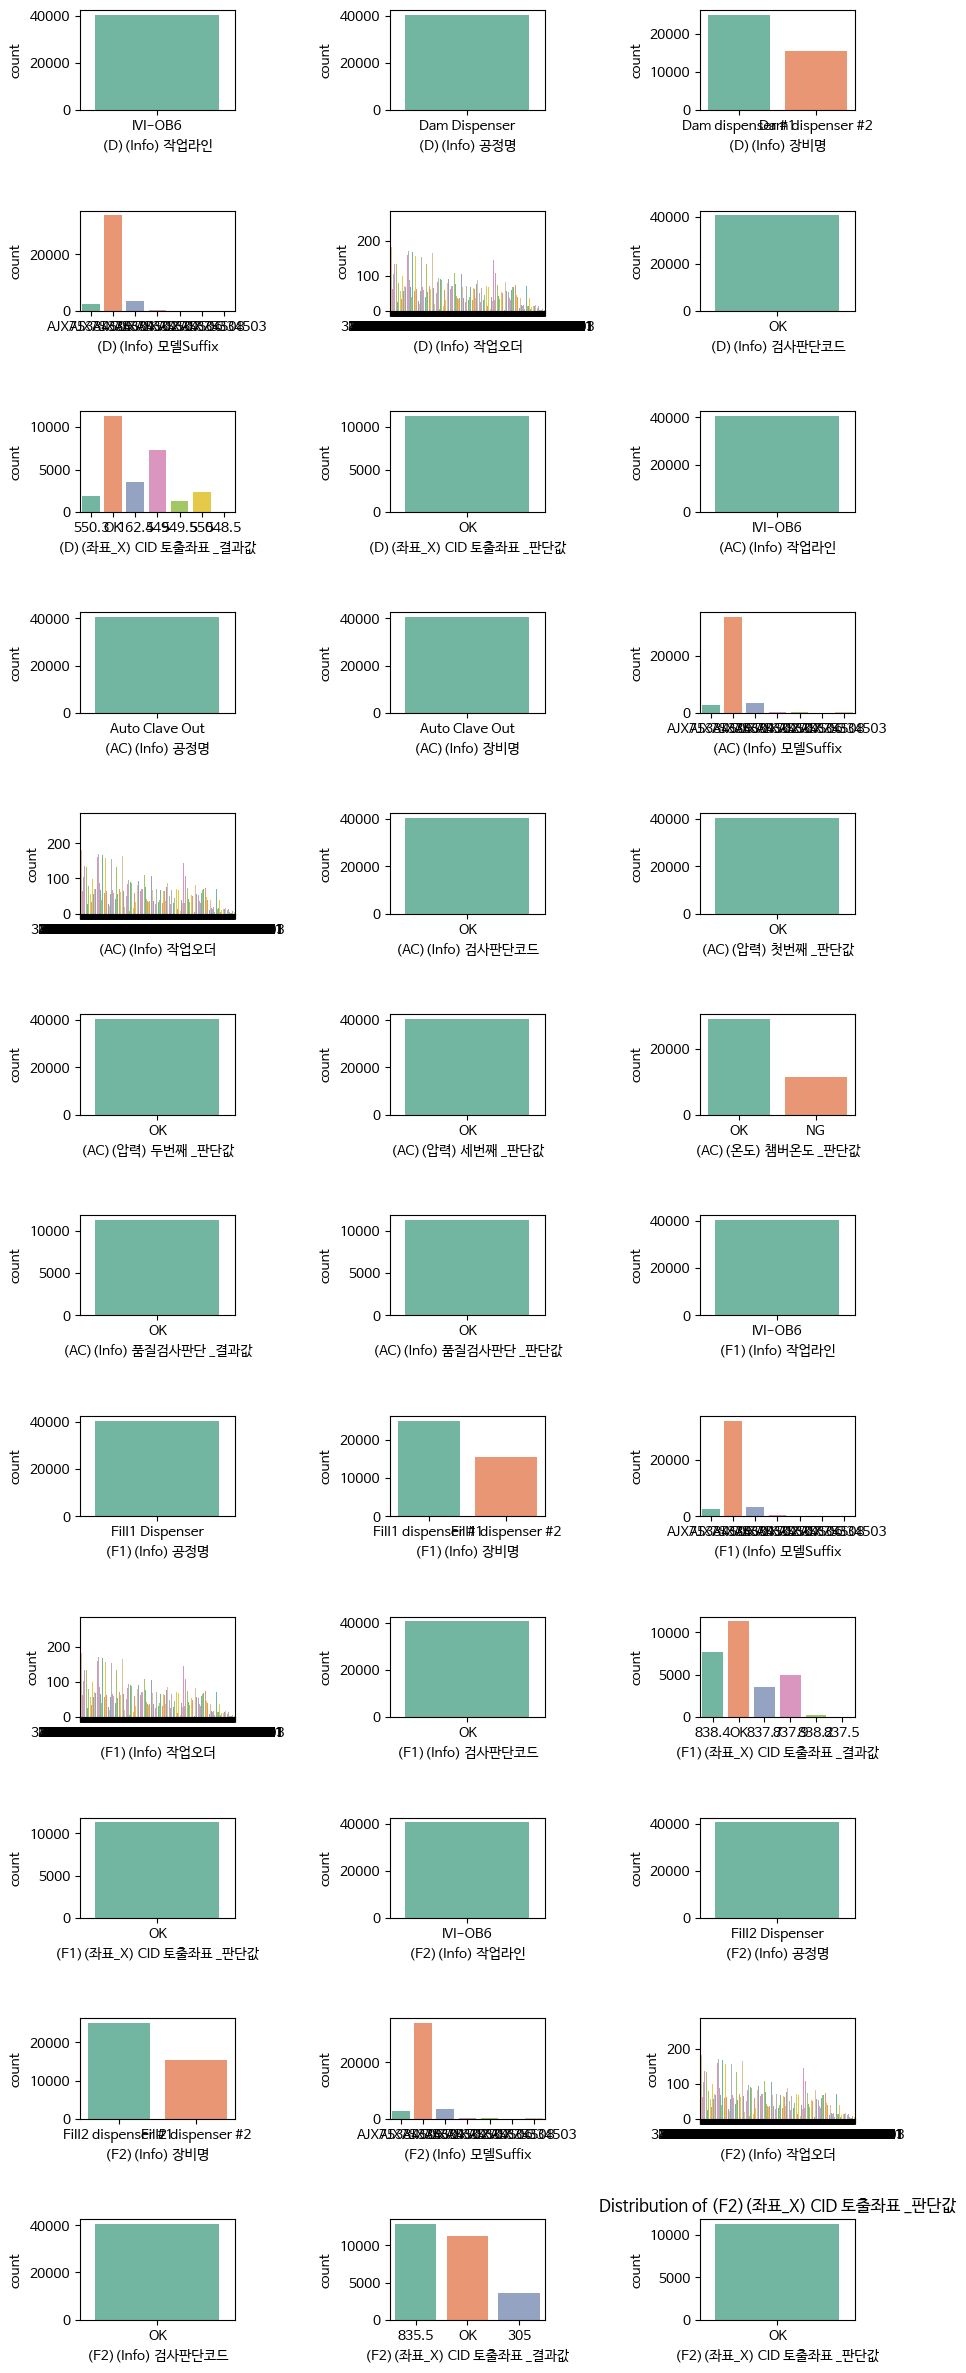

In [159]:
len_cols = len(categorical_cols)
mod = 3

fig, ax = plt.subplots(math.ceil(len_cols//mod), mod, figsize=(10,30))
plt.subplots_adjust(hspace=1, wspace=1)

for i, col in enumerate(categorical_cols):
    sns.countplot(x = col, data = categorical_df, palette='Set2',
                 ax=ax[i//mod, i%mod])
    plt.title(f'Distribution of {col}')
plt.show()    

In [129]:
eng_kor_cols = {
 'Wip Line_Dam': '(D)(Info) 작업라인',
 'Process Desc._Dam': '(D)(Info) 공정명',
 'Equipment_Dam': '(D)(Info) 장비명',
 'Model.Suffix_Dam': '(D)(Info) 모델Suffix',
 'Workorder_Dam': '(D)(Info) 작업오더',
 'Insp. Seq No._Dam': '(D)(Info) 검사순번',
 'Insp Judge Code_Dam': '(D)(Info) 검사판단코드',
 'CURE END POSITION X Collect Result_Dam': '(D)(위치_X) 경화종료 _결과값',
 'CURE END POSITION X Unit Time_Dam': '(D)(위치_X) 경화종료 _단위시간',
 'CURE END POSITION X Judge Value_Dam': '(D)(위치_X) 경화종료 _판단값',
 'CURE END POSITION Z Collect Result_Dam': '(D)(위치_Z) 경화종료 _결과값',
 'CURE END POSITION Z Unit Time_Dam': '(D)(위치_Z) 경화종료 _단위시간',
 'CURE END POSITION Z Judge Value_Dam': '(D)(위치_Z) 경화종료 _판단값',
 'CURE END POSITION Θ Collect Result_Dam': '(D)(위치_Θ) 경화종료 _결과값',
 'CURE END POSITION Θ Unit Time_Dam': '(D)(위치_Θ) 경화종료 _단위시간',
 'CURE END POSITION Θ Judge Value_Dam': '(D)(위치_Θ) 경화종료 _판단값',
 'CURE SPEED Collect Result_Dam': '(D)(속도) 경화 _결과값',
 'CURE SPEED Unit Time_Dam': '(D)(속도) 경화 _단위시간',
 'CURE SPEED Judge Value_Dam': '(D)(속도) 경화 _판단값',
 'CURE STANDBY POSITION X Collect Result_Dam': '(D)(위치_X) 경화대기 _결과값',
 'CURE STANDBY POSITION X Unit Time_Dam': '(D)(위치_X) 경화대기 _단위시간',
 'CURE STANDBY POSITION X Judge Value_Dam': '(D)(위치_X) 경화대기 _판단값',
 'CURE STANDBY POSITION Z Collect Result_Dam': '(D)(위치_Z) 경화대기 _결과값',
 'CURE STANDBY POSITION Z Unit Time_Dam': '(D)(위치_Z) 경화대기 _단위시간',
 'CURE STANDBY POSITION Z Judge Value_Dam': '(D)(위치_Z) 경화대기 _판단값',
 'CURE STANDBY POSITION Θ Collect Result_Dam': '(D)(위치_Θ) 경화대기 _결과값',
 'CURE STANDBY POSITION Θ Unit Time_Dam': '(D)(위치_Θ) 경화대기 _단위시간',
 'CURE STANDBY POSITION Θ Judge Value_Dam': '(D)(위치_Θ) 경화대기 _판단값',
 'CURE START POSITION X Collect Result_Dam': '(D)(위치_X) 경화시작 _결과값',
 'CURE START POSITION X Unit Time_Dam': '(D)(위치_X) 경화시작 _단위시간',
 'CURE START POSITION X Judge Value_Dam': '(D)(위치_X) 경화시작 _판단값',
 'CURE START POSITION Z Collect Result_Dam': '(D)(위치_Z) 경화시작 _결과값',
 'CURE START POSITION Z Unit Time_Dam': '(D)(위치_Z) 경화시작 _단위시간',
 'CURE START POSITION Z Judge Value_Dam': '(D)(위치_Z) 경화시작 _판단값',
 'CURE START POSITION Θ Collect Result_Dam': '(D)(위치_Θ) 경화시작 _결과값',
 'CURE START POSITION Θ Unit Time_Dam': '(D)(위치_Θ) 경화시작 _단위시간',
 'CURE START POSITION Θ Judge Value_Dam': '(D)(위치_Θ) 경화시작 _판단값',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam': '(D)(속도) 레진토출 _결과값',
 'DISCHARGED SPEED OF RESIN Unit Time_Dam': '(D)(속도) 레진토출 _단위시간',
 'DISCHARGED SPEED OF RESIN Judge Value_Dam': '(D)(속도) 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam': '(D)(시간) CID 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage1) Unit Time_Dam': '(D)(시간) CID 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage1) Judge Value_Dam': '(D)(시간) CID 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam': '(D)(시간) Seg 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage2) Unit Time_Dam': '(D)(시간) Seg 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage2) Judge Value_Dam': '(D)(시간) Seg 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam': '(D)(시간) Cluster 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage3) Unit Time_Dam': '(D)(시간) Cluster 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage3) Judge Value_Dam': '(D)(시간) Cluster 레진토출 _판단값',
 'Dispense Volume(Stage1) Collect Result_Dam': '(D)(양) CID 레진토출량 _결과값',
 'Dispense Volume(Stage1) Unit Time_Dam': '(D)(양) CID 레진토출량 _단위시간',
 'Dispense Volume(Stage1) Judge Value_Dam': '(D)(양) CID 레진토출량 _판단값',
 'Dispense Volume(Stage2) Collect Result_Dam': '(D)(양) Seg 레진토출량 _결과값',
 'Dispense Volume(Stage2) Unit Time_Dam': '(D)(양) Seg 레진토출량 _단위시간',
 'Dispense Volume(Stage2) Judge Value_Dam': '(D)(양) Seg 레진토출량 _판단값',
 'Dispense Volume(Stage3) Collect Result_Dam': '(D)(양) Cluster 레진토출량 _결과값',
 'Dispense Volume(Stage3) Unit Time_Dam': '(D)(양) Cluster 레진토출량 _단위시간',
 'Dispense Volume(Stage3) Judge Value_Dam': '(D)(양) Cluster 레진토출량 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam': '(D)(좌표_X) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Dam': '(D)(좌표_X) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam': '(D)(좌표_X) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam': '(D)(좌표_X) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Dam': '(D)(좌표_X) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Dam': '(D)(좌표_X) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam': '(D)(좌표_X) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Dam': '(D)(좌표_X) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Dam': '(D)(좌표_X) Cluster 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam': '(D)(좌표_Y) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Dam': '(D)(좌표_Y) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Dam': '(D)(좌표_Y) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam': '(D)(좌표_Y) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Dam': '(D)(좌표_Y) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Dam': '(D)(좌표_Y) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam': '(D)(좌표_Y) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Dam': '(D)(좌표_Y) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Dam': '(D)(좌표_Y) Cluster 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam': '(D)(좌표_Z) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Dam': '(D)(좌표_Z) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Dam': '(D)(좌표_Z) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam': '(D)(좌표_Z) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Dam': '(D)(좌표_Z) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Dam': '(D)(좌표_Z) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam': '(D)(좌표_Z) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Dam': '(D)(좌표_Z) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Dam': '(D)(좌표_Z) Cluster 토출좌표 _판단값',
 'HEAD Standby Position X Collect Result_Dam': '(D)(좌표_X) 대기좌표 _결과값',
 'HEAD Standby Position X Unit Time_Dam': '(D)(좌표_X) 대기좌표 _단위시간',
 'HEAD Standby Position X Judge Value_Dam': '(D)(좌표_X) 대기좌표 _판단값',
 'HEAD Standby Position Y Collect Result_Dam': '(D)(좌표_Y) 대기좌표 _결과값',
 'HEAD Standby Position Y Unit Time_Dam': '(D)(좌표_Y) 대기좌표 _단위시간',
 'HEAD Standby Position Y Judge Value_Dam': '(D)(좌표_Y) 대기좌표 _판단값',
 'HEAD Standby Position Z Collect Result_Dam': '(D)(좌표_Z) 대기좌표 _결과값',
 'HEAD Standby Position Z Unit Time_Dam': '(D)(좌표_Z) 대기좌표 _단위시간',
 'HEAD Standby Position Z Judge Value_Dam': '(D)(좌표_Z) 대기좌표 _판단값',
 'Head Clean Position X Collect Result_Dam': '(D)(좌표_X) 노즈클린좌표 _결과값',
 'Head Clean Position X Unit Time_Dam': '(D)(좌표_X) 노즈클린좌표 _단위시간',
 'Head Clean Position X Judge Value_Dam': '(D)(좌표_X) 노즈클린좌표 _판단값',
 'Head Clean Position Y Collect Result_Dam': '(D)(좌표_Y) 노즈클린좌표 _결과값',
 'Head Clean Position Y Unit Time_Dam': '(D)(좌표_Y) 노즈클린좌표 _단위시간',
 'Head Clean Position Y Judge Value_Dam': '(D)(좌표_Y) 노즈클린좌표 _판단값',
 'Head Clean Position Z Collect Result_Dam': '(D)(좌표_Z) 노즈클린좌표 _결과값',
 'Head Clean Position Z Unit Time_Dam': '(D)(좌표_Z) 노즈클린좌표 _단위시간',
 'Head Clean Position Z Judge Value_Dam': '(D)(좌표_Z) 노즈클린좌표 _판단값',
 'Head Purge Position X Collect Result_Dam': '(D)(좌표_X) Resin_drain좌표 _결과값',
 'Head Purge Position X Unit Time_Dam': '(D)(좌표_X) Resin_drain좌표 _단위시간',
 'Head Purge Position X Judge Value_Dam': '(D)(좌표_X) Resin_drain좌표 _판단값',
 'Head Purge Position Y Collect Result_Dam': '(D)(좌표_Y) Resin_drain좌표 _결과값',
 'Head Purge Position Y Unit Time_Dam': '(D)(좌표_Y) Resin_drain좌표 _단위시간',
 'Head Purge Position Y Judge Value_Dam': '(D)(좌표_Y) Resin_drain좌표 _판단값',
 'Head Purge Position Z Collect Result_Dam': '(D)(좌표_Z) Resin_drain좌표 _결과값',
 'Head Purge Position Z Unit Time_Dam': '(D)(좌표_Z) Resin_drain좌표 _단위시간',
 'Head Purge Position Z Judge Value_Dam': '(D)(좌표_Z) Resin_drain좌표 _판단값',
 'Head Zero Position X Collect Result_Dam': '(D)(좌표_X) Zero좌표 _결과값',
 'Head Zero Position X Unit Time_Dam': '(D)(좌표_X) Zero좌표 _단위시간',
 'Head Zero Position X Judge Value_Dam': '(D)(좌표_X) Zero좌표 _판단값',
 'Head Zero Position Y Collect Result_Dam': '(D)(좌표_Y) Zero좌표 _결과값',
 'Head Zero Position Y Unit Time_Dam': '(D)(좌표_Y) Zero좌표 _단위시간',
 'Head Zero Position Y Judge Value_Dam': '(D)(좌표_Y) Zero좌표 _판단값',
 'Head Zero Position Z Collect Result_Dam': '(D)(좌표_Z) Zero좌표 _결과값',
 'Head Zero Position Z Unit Time_Dam': '(D)(좌표_Z) Zero좌표 _단위시간',
 'Head Zero Position Z Judge Value_Dam': '(D)(좌표_Z) Zero좌표 _판단값',
 'Machine Tact time Collect Result_Dam': '(D)(시간) 공정소요시간 _결과값',
 'Machine Tact time Unit Time_Dam': '(D)(시간) 공정소요시간 _단위시간',
 'Machine Tact time Judge Value_Dam': '(D)(시간) 공정소요시간 _판단값',
 'PalletID Collect Result_Dam': '(D)(ID) 팔렛트ID _결과값',
 'PalletID Unit Time_Dam': '(D)(ID) 팔렛트ID _단위시간',
 'PalletID Judge Value_Dam': '(D)(ID) 팔렛트ID _판단값',
 'Production Qty Collect Result_Dam': '(D)(양) 산출량 _결과값',
 'Production Qty Unit Time_Dam': '(D)(양) 산출량 _단위시간',
 'Production Qty Judge Value_Dam': '(D)(양) 산출량 _판단값',
 'Receip No Collect Result_Dam': '(D)(No) 입고 _결과값',
 'Receip No Unit Time_Dam': '(D)(No) 입고 _단위시간',
 'Receip No Judge Value_Dam': '(D)(No) 입고 _판단값',
 'Stage1 Circle1 Distance Speed Collect Result_Dam': '(D)(속도) CID_1 R수치 _결과값',
 'Stage1 Circle1 Distance Speed Unit Time_Dam': '(D)(속도) CID_1 R수치 _단위시간',
 'Stage1 Circle1 Distance Speed Judge Value_Dam': '(D)(속도) CID_1 R수치 _판단값',
 'Stage1 Circle2 Distance Speed Collect Result_Dam': '(D)(속도) CID_2 R수치 _결과값',
 'Stage1 Circle2 Distance Speed Unit Time_Dam': '(D)(속도) CID_2 R수치 _단위시간',
 'Stage1 Circle2 Distance Speed Judge Value_Dam': '(D)(속도) CID_2 R수치 _판단값',
 'Stage1 Circle3 Distance Speed Collect Result_Dam': '(D)(속도) CID_3 R수치 _결과값',
 'Stage1 Circle3 Distance Speed Unit Time_Dam': '(D)(속도) CID_3 R수치 _단위시간',
 'Stage1 Circle3 Distance Speed Judge Value_Dam': '(D)(속도) CID_3 R수치 _판단값',
 'Stage1 Circle4 Distance Speed Collect Result_Dam': '(D)(속도) CID_4 R수치 _결과값',
 'Stage1 Circle4 Distance Speed Unit Time_Dam': '(D)(속도) CID_4 R수치 _단위시간',
 'Stage1 Circle4 Distance Speed Judge Value_Dam': '(D)(속도) CID_4 R수치 _판단값',
 'Stage1 Line1 Distance Speed Collect Result_Dam': '(D)(속도) CID_1 토출스피드 _결과값',
 'Stage1 Line1 Distance Speed Unit Time_Dam': '(D)(속도) CID_1 토출스피드 _단위시간',
 'Stage1 Line1 Distance Speed Judge Value_Dam': '(D)(속도) CID_1 토출스피드 _판단값',
 'Stage1 Line2 Distance Speed Collect Result_Dam': '(D)(속도) CID_2 토출스피드 _결과값',
 'Stage1 Line2 Distance Speed Unit Time_Dam': '(D)(속도) CID_2 토출스피드 _단위시간',
 'Stage1 Line2 Distance Speed Judge Value_Dam': '(D)(속도) CID_2 토출스피드 _판단값',
 'Stage1 Line3 Distance Speed Collect Result_Dam': '(D)(속도) CID_3 토출스피드 _결과값',
 'Stage1 Line3 Distance Speed Unit Time_Dam': '(D)(속도) CID_3 토출스피드 _단위시간',
 'Stage1 Line3 Distance Speed Judge Value_Dam': '(D)(속도) CID_3 토출스피드 _판단값',
 'Stage1 Line4 Distance Speed Collect Result_Dam': '(D)(속도) CID_4 토출스피드 _결과값',
 'Stage1 Line4 Distance Speed Unit Time_Dam': '(D)(속도) CID_4 토출스피드 _단위시간',
 'Stage1 Line4 Distance Speed Judge Value_Dam': '(D)(속도) CID_4 토출스피드 _판단값',
 'Stage2 Circle1 Distance Speed Collect Result_Dam': '(D)(속도) Seg_1 R수치 _결과값',
 'Stage2 Circle1 Distance Speed Unit Time_Dam': '(D)(속도) Seg_1 R수치 _단위시간',
 'Stage2 Circle1 Distance Speed Judge Value_Dam': '(D)(속도) Seg_1 R수치 _판단값',
 'Stage2 Circle2 Distance Speed Collect Result_Dam': '(D)(속도) Seg_2 R수치 _결과값',
 'Stage2 Circle2 Distance Speed Unit Time_Dam': '(D)(속도) Seg_2 R수치 _단위시간',
 'Stage2 Circle2 Distance Speed Judge Value_Dam': '(D)(속도) Seg_2 R수치 _판단값',
 'Stage2 Circle3 Distance Speed Collect Result_Dam': '(D)(속도) Seg_3 R수치 _결과값',
 'Stage2 Circle3 Distance Speed Unit Time_Dam': '(D)(속도) Seg_3 R수치 _단위시간',
 'Stage2 Circle3 Distance Speed Judge Value_Dam': '(D)(속도) Seg_3 R수치 _판단값',
 'Stage2 Circle4 Distance Speed Collect Result_Dam': '(D)(속도) Seg_4 R수치 _결과값',
 'Stage2 Circle4 Distance Speed Unit Time_Dam': '(D)(속도) Seg_4 R수치 _단위시간',
 'Stage2 Circle4 Distance Speed Judge Value_Dam': '(D)(속도) Seg_4 R수치 _판단값',
 'Stage2 Line1 Distance Speed Collect Result_Dam': '(D)(속도) Seg_1 토출스피드 _결과값',
 'Stage2 Line1 Distance Speed Unit Time_Dam': '(D)(속도) Seg_1 토출스피드 _단위시간',
 'Stage2 Line1 Distance Speed Judge Value_Dam': '(D)(속도) Seg_1 토출스피드 _판단값',
 'Stage2 Line2 Distance Speed Collect Result_Dam': '(D)(속도) Seg_2 토출스피드 _결과값',
 'Stage2 Line2 Distance Speed Unit Time_Dam': '(D)(속도) Seg_2 토출스피드 _단위시간',
 'Stage2 Line2 Distance Speed Judge Value_Dam': '(D)(속도) Seg_2 토출스피드 _판단값',
 'Stage2 Line3 Distance Speed Collect Result_Dam': '(D)(속도) Seg_3 토출스피드 _결과값',
 'Stage2 Line3 Distance Speed Unit Time_Dam': '(D)(속도) Seg_3 토출스피드 _단위시간',
 'Stage2 Line3 Distance Speed Judge Value_Dam': '(D)(속도) Seg_3 토출스피드 _판단값',
 'Stage2 Line4 Distance Speed Collect Result_Dam': '(D)(속도) Seg_4 토출스피드 _결과값',
 'Stage2 Line4 Distance Speed Unit Time_Dam': '(D)(속도) Seg_4 토출스피드 _단위시간',
 'Stage2 Line4 Distance Speed Judge Value_Dam': '(D)(속도) Seg_4 토출스피드 _판단값',
 'Stage3 Circle1 Distance Speed Collect Result_Dam': '(D)(속도) Cluster_1 R수치 _결과값',
 'Stage3 Circle1 Distance Speed Unit Time_Dam': '(D)(속도) Cluster_1 R수치 _단위시간',
 'Stage3 Circle1 Distance Speed Judge Value_Dam': '(D)(속도) Cluster_1 R수치 _판단값',
 'Stage3 Circle2 Distance Speed Collect Result_Dam': '(D)(속도) Cluster_2 R수치 _결과값',
 'Stage3 Circle2 Distance Speed Unit Time_Dam': '(D)(속도) Cluster_2 R수치 _단위시간',
 'Stage3 Circle2 Distance Speed Judge Value_Dam': '(D)(속도) Cluster_2 R수치 _판단값',
 'Stage3 Circle3 Distance Speed Collect Result_Dam': '(D)(속도) Cluster_3 R수치 _결과값',
 'Stage3 Circle3 Distance Speed Unit Time_Dam': '(D)(속도) Cluster_3 R수치 _단위시간',
 'Stage3 Circle3 Distance Speed Judge Value_Dam': '(D)(속도) Cluster_3 R수치 _판단값',
 'Stage3 Circle4 Distance Speed Collect Result_Dam': '(D)(속도) Cluster_4 R수치 _결과값',
 'Stage3 Circle4 Distance Speed Unit Time_Dam': '(D)(속도) Cluster_4 R수치 _단위시간',
 'Stage3 Circle4 Distance Speed Judge Value_Dam': '(D)(속도) Cluster_4 R수치 _판단값',
 'Stage3 Line1 Distance Speed Collect Result_Dam': '(D)(속도) Cluster_1 토출스피드 _결과값',
 'Stage3 Line1 Distance Speed Unit Time_Dam': '(D)(속도) Cluster_1 토출스피드 _단위시간',
 'Stage3 Line1 Distance Speed Judge Value_Dam': '(D)(속도) Cluster_1 토출스피드 _판단값',
 'Stage3 Line2 Distance Speed Collect Result_Dam': '(D)(속도) Cluster_2 토출스피드 _결과값',
 'Stage3 Line2 Distance Speed Unit Time_Dam': '(D)(속도) Cluster_2 토출스피드 _단위시간',
 'Stage3 Line2 Distance Speed Judge Value_Dam': '(D)(속도) Cluster_2 토출스피드 _판단값',
 'Stage3 Line3 Distance Speed Collect Result_Dam': '(D)(속도) Cluster_3 토출스피드 _결과값',
 'Stage3 Line3 Distance Speed Unit Time_Dam': '(D)(속도) Cluster_3 토출스피드 _단위시간',
 'Stage3 Line3 Distance Speed Judge Value_Dam': '(D)(속도) Cluster_3 토출스피드 _판단값',
 'Stage3 Line4 Distance Speed Collect Result_Dam': '(D)(속도) Cluster_4 토출스피드 _결과값',
 'Stage3 Line4 Distance Speed Unit Time_Dam': '(D)(속도) Cluster_4 토출스피드 _단위시간',
 'Stage3 Line4 Distance Speed Judge Value_Dam': '(D)(속도) Cluster_4 토출스피드 _판단값',
 'THICKNESS 1 Collect Result_Dam': '(D)(두께) 1 _결과값',
 'THICKNESS 1 Unit Time_Dam': '(D)(두께) 1 _단위시간',
 'THICKNESS 1 Judge Value_Dam': '(D)(두께) 1 _판단값',
 'THICKNESS 2 Collect Result_Dam': '(D)(두께) 2 _결과값',
 'THICKNESS 2 Unit Time_Dam': '(D)(두께) 2 _단위시간',
 'THICKNESS 2 Judge Value_Dam': '(D)(두께) 2 _판단값',
 'THICKNESS 3 Collect Result_Dam': '(D)(두께) 3 _결과값',
 'THICKNESS 3 Unit Time_Dam': '(D)(두께) 3 _단위시간',
 'THICKNESS 3 Judge Value_Dam': '(D)(두께) 3 _판단값',
 'WorkMode Collect Result_Dam': '(D)(Mod) 작업모드 _결과값',
 'WorkMode Unit Time_Dam': '(D)(Mod) 작업모드 _단위시간',
 'WorkMode Judge Value_Dam': '(D)(Mod) 작업모드 _판단값',
 'Wip Line_AutoClave': '(AC)(Info) 작업라인',
 'Process Desc._AutoClave': '(AC)(Info) 공정명',
 'Equipment_AutoClave': '(AC)(Info) 장비명',
 'Model.Suffix_AutoClave': '(AC)(Info) 모델Suffix',
 'Workorder_AutoClave': '(AC)(Info) 작업오더',
 'Insp. Seq No._AutoClave': '(AC)(Info) 검사순번',
 'Insp Judge Code_AutoClave': '(AC)(Info) 검사판단코드',
 '1st Pressure Collect Result_AutoClave': '(AC)(압력) 첫번째 _결과값',
 '1st Pressure 1st Pressure Unit Time_AutoClave': '(AC)(압력) 첫번째 _단위시간',
 '1st Pressure Judge Value_AutoClave': '(AC)(압력) 첫번째 _판단값',
 '2nd Pressure Collect Result_AutoClave': '(AC)(압력) 두번째 _결과값',
 '2nd Pressure Unit Time_AutoClave': '(AC)(압력) 두번째 _단위시간',
 '2nd Pressure Judge Value_AutoClave': '(AC)(압력) 두번째 _판단값',
 '3rd Pressure Collect Result_AutoClave': '(AC)(압력) 세번째 _결과값',
 '3rd Pressure Unit Time_AutoClave': '(AC)(압력) 세번째 _단위시간',
 '3rd Pressure Judge Value_AutoClave': '(AC)(압력) 세번째 _판단값',
 'Chamber Temp. Collect Result_AutoClave': '(AC)(온도) 챔버온도 _결과값',
 'Chamber Temp. Unit Time_AutoClave': '(AC)(온도) 챔버온도 _단위시간',
 'Chamber Temp. Judge Value_AutoClave': '(AC)(온도) 챔버온도 _판단값',
 'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave': '(AC)(Info) 품질검사판단 _결과값',
 'GMES_ORIGIN_INSP_JUDGE_CODE Unit Time_AutoClave': '(AC)(Info) 품질검사판단 _단위시간',
 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave': '(AC)(Info) 품질검사판단 _판단값',
 'Wip Line_Fill1': '(F1)(Info) 작업라인',
 'Process Desc._Fill1': '(F1)(Info) 공정명',
 'Equipment_Fill1': '(F1)(Info) 장비명',
 'Model.Suffix_Fill1': '(F1)(Info) 모델Suffix',
 'Workorder_Fill1': '(F1)(Info) 작업오더',
 'Insp. Seq No._Fill1': '(F1)(Info) 검사순번',
 'Insp Judge Code_Fill1': '(F1)(Info) 검사판단코드',
 'DISCHARGED SPEED OF RESIN Collect Result_Fill1': '(F1)(속도) 레진토출 _결과값',
 'DISCHARGED SPEED OF RESIN Unit Time_Fill1': '(F1)(속도) 레진토출 _단위시간',
 'DISCHARGED SPEED OF RESIN Judge Value_Fill1': '(F1)(속도) 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1': '(F1)(시간) CID 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage1) Unit Time_Fill1': '(F1)(시간) CID 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage1) Judge Value_Fill1': '(F1)(시간) CID 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1': '(F1)(시간) Seg 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage2) Unit Time_Fill1': '(F1)(시간) Seg 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage2) Judge Value_Fill1': '(F1)(시간) Seg 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1': '(F1)(시간) Cluster 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage3) Unit Time_Fill1': '(F1)(시간) Cluster 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage3) Judge Value_Fill1': '(F1)(시간) Cluster 레진토출 _판단값',
 'Dispense Volume(Stage1) Collect Result_Fill1': '(F1)(양) CID 레진토출량 _결과값',
 'Dispense Volume(Stage1) Unit Time_Fill1': '(F1)(양) CID 레진토출량 _단위시간',
 'Dispense Volume(Stage1) Judge Value_Fill1': '(F1)(양) CID 레진토출량 _판단값',
 'Dispense Volume(Stage2) Collect Result_Fill1': '(F1)(양) Seg 레진토출량 _결과값',
 'Dispense Volume(Stage2) Unit Time_Fill1': '(F1)(양) Seg 레진토출량 _단위시간',
 'Dispense Volume(Stage2) Judge Value_Fill1': '(F1)(양) Seg 레진토출량 _판단값',
 'Dispense Volume(Stage3) Collect Result_Fill1': '(F1)(양) Cluster 레진토출량 _결과값',
 'Dispense Volume(Stage3) Unit Time_Fill1': '(F1)(양) Cluster 레진토출량 _단위시간',
 'Dispense Volume(Stage3) Judge Value_Fill1': '(F1)(양) Cluster 레진토출량 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1': '(F1)(좌표_X) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Fill1': '(F1)(좌표_X) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1': '(F1)(좌표_X) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1': '(F1)(좌표_X) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Fill1': '(F1)(좌표_X) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Fill1': '(F1)(좌표_X) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1': '(F1)(좌표_X) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Fill1': '(F1)(좌표_X) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Fill1': '(F1)(좌표_X) Cluster 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1': '(F1)(좌표_Y) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Fill1': '(F1)(좌표_Y) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Fill1': '(F1)(좌표_Y) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1': '(F1)(좌표_Y) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Fill1': '(F1)(좌표_Y) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Fill1': '(F1)(좌표_Y) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1': '(F1)(좌표_Y) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Fill1': '(F1)(좌표_Y) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Fill1': '(F1)(좌표_Y) Cluster 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1': '(F1)(좌표_Z) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Fill1': '(F1)(좌표_Z) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Fill1': '(F1)(좌표_Z) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1': '(F1)(좌표_Z) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Fill1': '(F1)(좌표_Z) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Fill1': '(F1)(좌표_Z) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1': '(F1)(좌표_Z) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Fill1': '(F1)(좌표_Z) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Fill1': '(F1)(좌표_Z) Cluster 토출좌표 _판단값',
 'HEAD Standby Position X Collect Result_Fill1': '(F1)(좌표_X) 대기좌표 _결과값',
 'HEAD Standby Position X Unit Time_Fill1': '(F1)(좌표_X) 대기좌표 _단위시간',
 'HEAD Standby Position X Judge Value_Fill1': '(F1)(좌표_X) 대기좌표 _판단값',
 'HEAD Standby Position Y Collect Result_Fill1': '(F1)(좌표_Y) 대기좌표 _결과값',
 'HEAD Standby Position Y Unit Time_Fill1': '(F1)(좌표_Y) 대기좌표 _단위시간',
 'HEAD Standby Position Y Judge Value_Fill1': '(F1)(좌표_Y) 대기좌표 _판단값',
 'HEAD Standby Position Z Collect Result_Fill1': '(F1)(좌표_Z) 대기좌표 _결과값',
 'HEAD Standby Position Z Unit Time_Fill1': '(F1)(좌표_Z) 대기좌표 _단위시간',
 'HEAD Standby Position Z Judge Value_Fill1': '(F1)(좌표_Z) 대기좌표 _판단값',
 'Head Clean Position X Collect Result_Fill1': '(F1)(좌표_X) 노즈클린좌표 _결과값',
 'Head Clean Position X Unit Time_Fill1': '(F1)(좌표_X) 노즈클린좌표 _단위시간',
 'Head Clean Position X Judge Value_Fill1': '(F1)(좌표_X) 노즈클린좌표 _판단값',
 'Head Clean Position Y Collect Result_Fill1': '(F1)(좌표_Y) 노즈클린좌표 _결과값',
 'Head Clean Position Y Unit Time_Fill1': '(F1)(좌표_Y) 노즈클린좌표 _단위시간',
 'Head Clean Position Y Judge Value_Fill1': '(F1)(좌표_Y) 노즈클린좌표 _판단값',
 'Head Clean Position Z Collect Result_Fill1': '(F1)(좌표_Z) 노즈클린좌표 _결과값',
 'Head Clean Position Z Unit Time_Fill1': '(F1)(좌표_Z) 노즈클린좌표 _단위시간',
 'Head Clean Position Z Judge Value_Fill1': '(F1)(좌표_Z) 노즈클린좌표 _판단값',
 'Head Purge Position X Collect Result_Fill1': '(F1)(좌표_X) Resin_drain좌표 _결과값',
 'Head Purge Position X Unit Time_Fill1': '(F1)(좌표_X) Resin_drain좌표 _단위시간',
 'Head Purge Position X Judge Value_Fill1': '(F1)(좌표_X) Resin_drain좌표 _판단값',
 'Head Purge Position Y Collect Result_Fill1': '(F1)(좌표_Y) Resin_drain좌표 _결과값',
 'Head Purge Position Y Unit Time_Fill1': '(F1)(좌표_Y) Resin_drain좌표 _단위시간',
 'Head Purge Position Y Judge Value_Fill1': '(F1)(좌표_Y) Resin_drain좌표 _판단값',
 'Head Purge Position Z Collect Result_Fill1': '(F1)(좌표_Z) Resin_drain좌표 _결과값',
 'Head Purge Position Z Unit Time_Fill1': '(F1)(좌표_Z) Resin_drain좌표 _단위시간',
 'Head Purge Position Z Judge Value_Fill1': '(F1)(좌표_Z) Resin_drain좌표 _판단값',
 'Machine Tact time Collect Result_Fill1': '(F1)(시간) 공정소요시간 _결과값',
 'Machine Tact time Unit Time_Fill1': '(F1)(시간) 공정소요시간 _단위시간',
 'Machine Tact time Judge Value_Fill1': '(F1)(시간) 공정소요시간 _판단값',
 'PalletID Collect Result_Fill1': '(F1)(ID) 팔렛트ID _결과값',
 'PalletID Unit Time_Fill1': '(F1)(ID) 팔렛트ID _단위시간',
 'PalletID Judge Value_Fill1': '(F1)(ID) 팔렛트ID _판단값',
 'Production Qty Collect Result_Fill1': '(F1)(양) 산출량 _결과값',
 'Production Qty Unit Time_Fill1': '(F1)(양) 산출량 _단위시간',
 'Production Qty Judge Value_Fill1': '(F1)(양) 산출량 _판단값',
 'Receip No Collect Result_Fill1': '(F1)(No) 입고 _결과값',
 'Receip No Unit Time_Fill1': '(F1)(No) 입고 _단위시간',
 'Receip No Judge Value_Fill1': '(F1)(No) 입고 _판단값',
 'WorkMode Collect Result_Fill1': '(F1)(Mod) 작업모드 _결과값',
 'WorkMode Unit Time_Fill1': '(F1)(Mod) 작업모드 _단위시간',
 'WorkMode Judge Value_Fill1': '(F1)(Mod) 작업모드 _판단값',
 'Wip Line_Fill2': '(F2)(Info) 작업라인',
 'Process Desc._Fill2': '(F2)(Info) 공정명',
 'Equipment_Fill2': '(F2)(Info) 장비명',
 'Model.Suffix_Fill2': '(F2)(Info) 모델Suffix',
 'Workorder_Fill2': '(F2)(Info) 작업오더',
 'Insp. Seq No._Fill2': '(F2)(Info) 검사순번',
 'Insp Judge Code_Fill2': '(F2)(Info) 검사판단코드',
 'CURE END POSITION X Collect Result_Fill2': '(F2)(위치_X) 경화종료 _결과값',
 'CURE END POSITION X Unit Time_Fill2': '(F2)(위치_X) 경화종료 _단위시간',
 'CURE END POSITION X Judge Value_Fill2': '(F2)(위치_X) 경화종료 _판단값',
 'CURE END POSITION Z Collect Result_Fill2': '(F2)(위치_Z) 경화종료 _결과값',
 'CURE END POSITION Z Unit Time_Fill2': '(F2)(위치_Z) 경화종료 _단위시간',
 'CURE END POSITION Z Judge Value_Fill2': '(F2)(위치_Z) 경화종료 _판단값',
 'CURE END POSITION Θ Collect Result_Fill2': '(F2)(위치_Θ) 경화종료 _결과값',
 'CURE END POSITION Θ Unit Time_Fill2': '(F2)(위치_Θ) 경화종료 _단위시간',
 'CURE END POSITION Θ Judge Value_Fill2': '(F2)(위치_Θ) 경화종료 _판단값',
 'CURE SPEED Collect Result_Fill2': '(F2)(속도) 경화 _결과값',
 'CURE SPEED Unit Time_Fill2': '(F2)(속도) 경화 _단위시간',
 'CURE SPEED Judge Value_Fill2': '(F2)(속도) 경화 _판단값',
 'CURE STANDBY POSITION X Collect Result_Fill2': '(F2)(위치_X) 경화대기 _결과값',
 'CURE STANDBY POSITION X Unit Time_Fill2': '(F2)(위치_X) 경화대기 _단위시간',
 'CURE STANDBY POSITION X Judge Value_Fill2': '(F2)(위치_X) 경화대기 _판단값',
 'CURE STANDBY POSITION Z Collect Result_Fill2': '(F2)(위치_Z) 경화대기 _결과값',
 'CURE STANDBY POSITION Z Unit Time_Fill2': '(F2)(위치_Z) 경화대기 _단위시간',
 'CURE STANDBY POSITION Z Judge Value_Fill2': '(F2)(위치_Z) 경화대기 _판단값',
 'CURE STANDBY POSITION Θ Collect Result_Fill2': '(F2)(위치_Θ) 경화대기 _결과값',
 'CURE STANDBY POSITION Θ Unit Time_Fill2': '(F2)(위치_Θ) 경화대기 _단위시간',
 'CURE STANDBY POSITION Θ Judge Value_Fill2': '(F2)(위치_Θ) 경화대기 _판단값',
 'CURE START POSITION X Collect Result_Fill2': '(F2)(위치_X) 경화시작 _결과값',
 'CURE START POSITION X Unit Time_Fill2': '(F2)(위치_X) 경화시작 _단위시간',
 'CURE START POSITION X Judge Value_Fill2': '(F2)(위치_X) 경화시작 _판단값',
 'CURE START POSITION Z Collect Result_Fill2': '(F2)(위치_Z) 경화시작 _결과값',
 'CURE START POSITION Z Unit Time_Fill2': '(F2)(위치_Z) 경화시작 _단위시간',
 'CURE START POSITION Z Judge Value_Fill2': '(F2)(위치_Z) 경화시작 _판단값',
 'CURE START POSITION Θ Collect Result_Fill2': '(F2)(위치_Θ) 경화시작 _결과값',
 'CURE START POSITION Θ Unit Time_Fill2': '(F2)(위치_Θ) 경화시작 _단위시간',
 'CURE START POSITION Θ Judge Value_Fill2': '(F2)(위치_Θ) 경화시작 _판단값',
 'DISCHARGED SPEED OF RESIN Collect Result_Fill2': '(F2)(속도) 레진토출 _결과값',
 'DISCHARGED SPEED OF RESIN Unit Time_Fill2': '(F2)(속도) 레진토출 _단위시간',
 'DISCHARGED SPEED OF RESIN Judge Value_Fill2': '(F2)(속도) 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2': '(F2)(시간) CID 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage1) Unit Time_Fill2': '(F2)(시간) CID 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage1) Judge Value_Fill2': '(F2)(시간) CID 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2': '(F2)(시간) Seg 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage2) Unit Time_Fill2': '(F2)(시간) Seg 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage2) Judge Value_Fill2': '(F2)(시간) Seg 레진토출 _판단값',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2': '(F2)(시간) Cluster 레진토출 _결과값',
 'DISCHARGED TIME OF RESIN(Stage3) Unit Time_Fill2': '(F2)(시간) Cluster 레진토출 _단위시간',
 'DISCHARGED TIME OF RESIN(Stage3) Judge Value_Fill2': '(F2)(시간) Cluster 레진토출 _판단값',
 'Dispense Volume(Stage1) Collect Result_Fill2': '(F2)(양) CID 레진토출량 _결과값',
 'Dispense Volume(Stage1) Unit Time_Fill2': '(F2)(양) CID 레진토출량 _단위시간',
 'Dispense Volume(Stage1) Judge Value_Fill2': '(F2)(양) CID 레진토출량 _판단값',
 'Dispense Volume(Stage2) Collect Result_Fill2': '(F2)(양) Seg 레진토출량 _결과값',
 'Dispense Volume(Stage2) Unit Time_Fill2': '(F2)(양) Seg 레진토출량 _단위시간',
 'Dispense Volume(Stage2) Judge Value_Fill2': '(F2)(양) Seg 레진토출량 _판단값',
 'Dispense Volume(Stage3) Collect Result_Fill2': '(F2)(양) Cluster 레진토출량 _결과값',
 'Dispense Volume(Stage3) Unit Time_Fill2': '(F2)(양) Cluster 레진토출량 _단위시간',
 'Dispense Volume(Stage3) Judge Value_Fill2': '(F2)(양) Cluster 레진토출량 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2': '(F2)(좌표_X) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Unit Time_Fill2': '(F2)(좌표_X) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2': '(F2)(좌표_X) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2': '(F2)(좌표_X) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Unit Time_Fill2': '(F2)(좌표_X) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Judge Value_Fill2': '(F2)(좌표_X) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2': '(F2)(좌표_X) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Unit Time_Fill2': '(F2)(좌표_X) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Judge Value_Fill2': '(F2)(좌표_X) Cluster 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2': '(F2)(좌표_Y) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Unit Time_Fill2': '(F2)(좌표_Y) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Judge Value_Fill2': '(F2)(좌표_Y) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2': '(F2)(좌표_Y) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Unit Time_Fill2': '(F2)(좌표_Y) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Judge Value_Fill2': '(F2)(좌표_Y) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2': '(F2)(좌표_Y) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Unit Time_Fill2': '(F2)(좌표_Y) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Judge Value_Fill2': '(F2)(좌표_Y) Cluster 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2': '(F2)(좌표_Z) CID 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Unit Time_Fill2': '(F2)(좌표_Z) CID 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Judge Value_Fill2': '(F2)(좌표_Z) CID 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2': '(F2)(좌표_Z) Seg 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Unit Time_Fill2': '(F2)(좌표_Z) Seg 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Judge Value_Fill2': '(F2)(좌표_Z) Seg 토출좌표 _판단값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2': '(F2)(좌표_Z) Cluster 토출좌표 _결과값',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Unit Time_Fill2': '(F2)(좌표_Z) Cluster 토출좌표 _단위시간',
 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Judge Value_Fill2': '(F2)(좌표_Z) Cluster 토출좌표 _판단값',
 'HEAD Standby Position X Collect Result_Fill2': '(F2)(좌표_X) 대기좌표 _결과값',
 'HEAD Standby Position X Unit Time_Fill2': '(F2)(좌표_X) 대기좌표 _단위시간',
 'HEAD Standby Position X Judge Value_Fill2': '(F2)(좌표_X) 대기좌표 _판단값',
 'HEAD Standby Position Y Collect Result_Fill2': '(F2)(좌표_Y) 대기좌표 _결과값',
 'HEAD Standby Position Y Unit Time_Fill2': '(F2)(좌표_Y) 대기좌표 _단위시간',
 'HEAD Standby Position Y Judge Value_Fill2': '(F2)(좌표_Y) 대기좌표 _판단값',
 'HEAD Standby Position Z Collect Result_Fill2': '(F2)(좌표_Z) 대기좌표 _결과값',
 'HEAD Standby Position Z Unit Time_Fill2': '(F2)(좌표_Z) 대기좌표 _단위시간',
 'HEAD Standby Position Z Judge Value_Fill2': '(F2)(좌표_Z) 대기좌표 _판단값',
 'Head Clean Position X Collect Result_Fill2': '(F2)(좌표_X) 노즈클린좌표 _결과값',
 'Head Clean Position X Unit Time_Fill2': '(F2)(좌표_X) 노즈클린좌표 _단위시간',
 'Head Clean Position X Judge Value_Fill2': '(F2)(좌표_X) 노즈클린좌표 _판단값',
 'Head Clean Position Y Collect Result_Fill2': '(F2)(좌표_Y) 노즈클린좌표 _결과값',
 'Head Clean Position Y Unit Time_Fill2': '(F2)(좌표_Y) 노즈클린좌표 _단위시간',
 'Head Clean Position Y Judge Value_Fill2': '(F2)(좌표_Y) 노즈클린좌표 _판단값',
 'Head Clean Position Z Collect Result_Fill2': '(F2)(좌표_Z) 노즈클린좌표 _결과값',
 'Head Clean Position Z Unit Time_Fill2': '(F2)(좌표_Z) 노즈클린좌표 _단위시간',
 'Head Clean Position Z Judge Value_Fill2': '(F2)(좌표_Z) 노즈클린좌표 _판단값',
 'Head Purge Position X Collect Result_Fill2': '(F2)(좌표_X) Resin_drain좌표 _결과값',
 'Head Purge Position X Unit Time_Fill2': '(F2)(좌표_X) Resin_drain좌표 _단위시간',
 'Head Purge Position X Judge Value_Fill2': '(F2)(좌표_X) Resin_drain좌표 _판단값',
 'Head Purge Position Y Collect Result_Fill2': '(F2)(좌표_Y) Resin_drain좌표 _결과값',
 'Head Purge Position Y Unit Time_Fill2': '(F2)(좌표_Y) Resin_drain좌표 _단위시간',
 'Head Purge Position Y Judge Value_Fill2': '(F2)(좌표_Y) Resin_drain좌표 _판단값',
 'Head Purge Position Z Collect Result_Fill2': '(F2)(좌표_Z) Resin_drain좌표 _결과값',
 'Head Purge Position Z Unit Time_Fill2': '(F2)(좌표_Z) Resin_drain좌표 _단위시간',
 'Head Purge Position Z Judge Value_Fill2': '(F2)(좌표_Z) Resin_drain좌표 _판단값',
 'Machine Tact time Collect Result_Fill2': '(F2)(시간) 공정소요시간 _결과값',
 'Machine Tact time Unit Time_Fill2': '(F2)(시간) 공정소요시간 _단위시간',
 'Machine Tact time Judge Value_Fill2': '(F2)(시간) 공정소요시간 _판단값',
 'PalletID Collect Result_Fill2': '(F2)(ID) 팔렛트ID _결과값',
 'PalletID Unit Time_Fill2': '(F2)(ID) 팔렛트ID _단위시간',
 'PalletID Judge Value_Fill2': '(F2)(ID) 팔렛트ID _판단값',
 'Production Qty Collect Result_Fill2': '(F2)(양) 산출량 _결과값',
 'Production Qty Unit Time_Fill2': '(F2)(양) 산출량 _단위시간',
 'Production Qty Judge Value_Fill2': '(F2)(양) 산출량 _판단값',
 'Receip No Collect Result_Fill2': '(F2)(No) 입고 _결과값',
 'Receip No Unit Time_Fill2': '(F2)(No) 입고 _단위시간',
 'Receip No Judge Value_Fill2': '(F2)(No) 입고 _판단값',
 'WorkMode Collect Result_Fill2': '(F2)(Mod) 작업모드 _결과값',
 'WorkMode Unit Time_Fill2': '(F2)(Mod) 작업모드 _단위시간',
 'WorkMode Judge Value_Fill2': '(F2)(Mod) 작업모드 _판단값',
 'target': 'target'}